In [1]:
#import libraries
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

In [2]:
#Define haversine formula
#Inputs are the coordinates of consecutive points, lon1, lat1, lon2, lat2
#Returns the distance between them

def haversine(lon1, lat1, lon2, lat2):
    """calculate the great circle distance in kilometers between two points on the earth (specified in decimal degrees)"""

    #convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])     

    #haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    r = 6371 #radius of earth in kilometers
    return c * r

In [3]:
#read data
#this is a Phyphox GPS measurement. Walking from Ideapark to the Motonet(Ritaharju)

data = pd.read_csv('gps.csv')
data.head()

Time (s)  Latitude (°)  Longitude (°)  Altitude (m)  Altitude WGS84 (m)  \
0  0.039959     65.076124      25.445402      3.922924           21.416689   
1  0.540308     65.076342      25.445393      5.616773           23.110626   
2  1.845838     65.076346      25.445394      7.230089           24.723944   
3  2.069810     65.076336      25.445288     16.402615           33.896478   
4  3.069803     65.076342      25.445314     19.257668           36.751531   

   Speed (m/s)  Direction (°)  Distance (km)  Horizontal Accuracy (m)  \
0          NaN            NaN       0.024193               200.854902   
1          NaN            NaN       0.024672                35.000000   
2          NaN            NaN       0.029795                35.000000   
3         0.00     206.367188       0.031197                 6.203807   
4         0.32     107.929688       0.032039                 3.869118   

   Vertical Accuracy (m)  Satellites  
0              12.360112        -1.0  
1              12.382041        -1.0  
2              13.693676        -1.0  
3              12.000000        -1.0  
4               8.000000        -1.0

In [5]:
#Derive velocity using haversine formula (although it is already in data in most cases)

lat = data['Latitude (°)'] #latitude
lon = data['Longitude (°)'] #longitude

data['dist'] = np.zeros(lat.shape[0]) #Add a new column (of zeros) to the data We'll calculate the distance between consecutive points there
data['time_diff']  = np.zeros(lat.shape[0]) #Add a new column (of zeros) to the data We'll calculate the time difference between consecutive points there

for i in range (lat.shape[0]-1): #For-loop goes trought the data untill the second last row
    data['dist'][i] = haversine(lon[i], lat[i], lon[i+1], lat[i+1])*1000 #The distance between data points with indices i and i+1(in meters)
    data['time_diff'][i] = data['Time (s)'][i+1] - data['Time (s)'][i] #The time difference between data points with indices i and i+1(in seconds)

data['dist'][0] = 0
data['velocity'] = data['dist']/data['time_diff']

data.head()

Time (s)  Latitude (°)  Longitude (°)  Altitude (m)  Altitude WGS84 (m)  \
0  0.039959     65.076124      25.445402      3.922924           21.416689   
1  0.540308     65.076342      25.445393      5.616773           23.110626   
2  1.845838     65.076346      25.445394      7.230089           24.723944   
3  2.069810     65.076336      25.445288     16.402615           33.896478   
4  3.069803     65.076342      25.445314     19.257668           36.751531   

   Speed (m/s)  Direction (°)  Distance (km)  Horizontal Accuracy (m)  \
0          NaN            NaN       0.024193               200.854902   
1          NaN            NaN       0.024672                35.000000   
2          NaN            NaN       0.029795                35.000000   
3         0.00     206.367188       0.031197                 6.203807   
4         0.32     107.929688       0.032039                 3.869118   

   Vertical Accuracy (m)  Satellites      dist  time_diff   velocity  
0              12.360112        -1.0  0.000000   0.500349   0.000000  
1              12.382041        -1.0  0.480384   1.305530   0.367961  
2              13.693676        -1.0  5.122850   0.223972  22.872705  
3              12.000000        -1.0  1.401978   0.999993   1.401988  
4               8.000000        -1.0  0.841807   0.999988   0.841817

Note: you may need to restart the kernel to use updated packages.


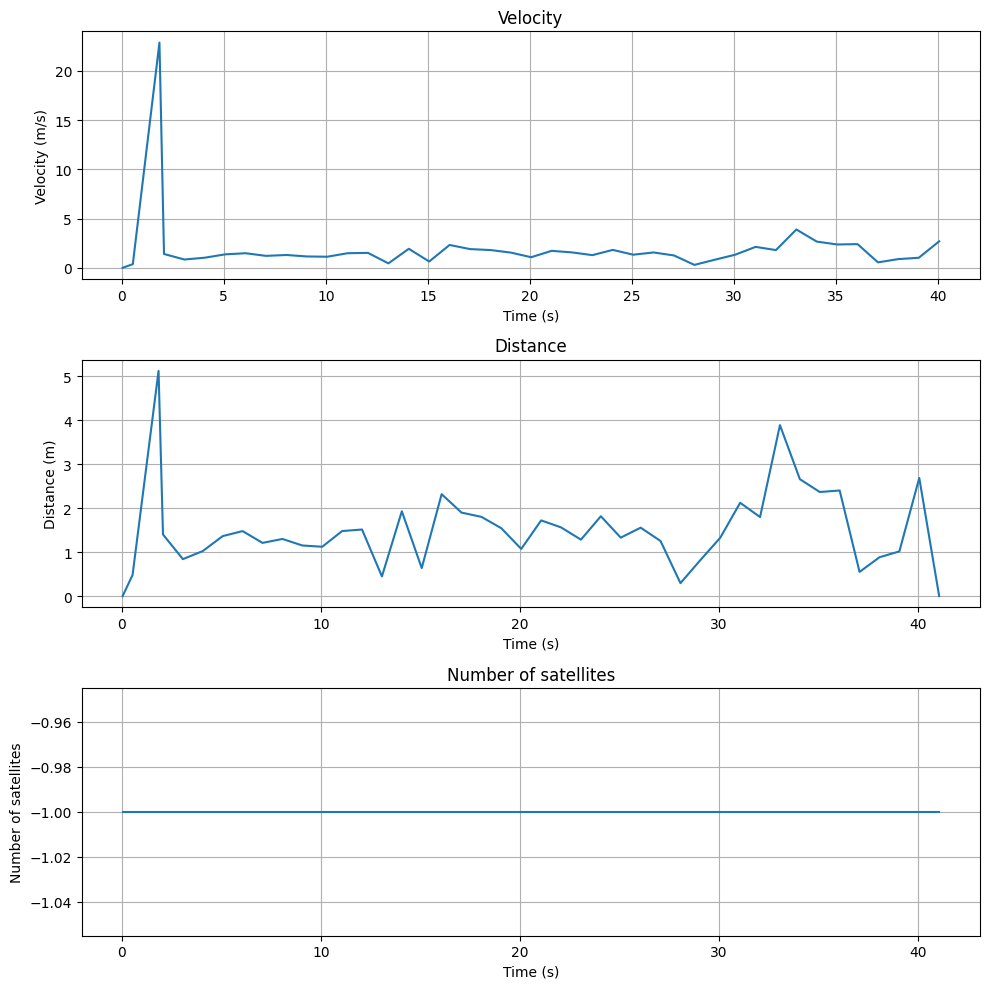

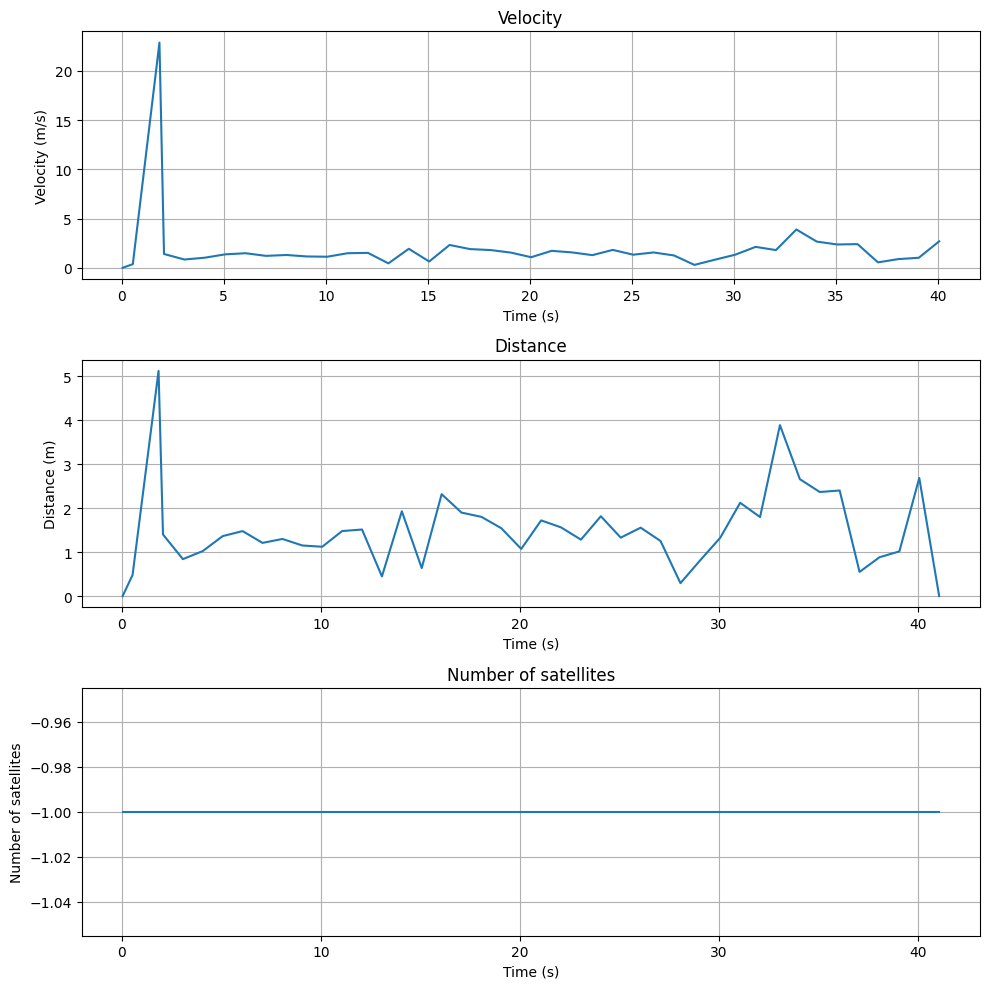

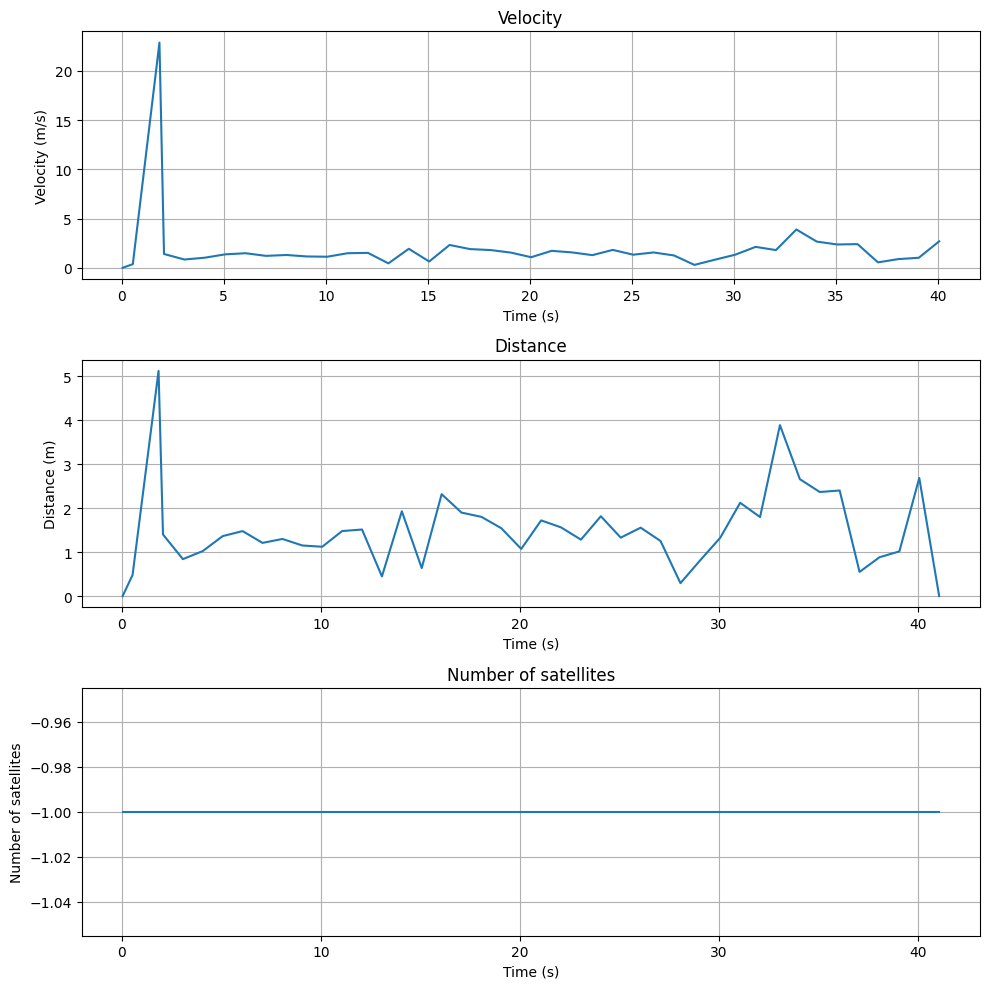

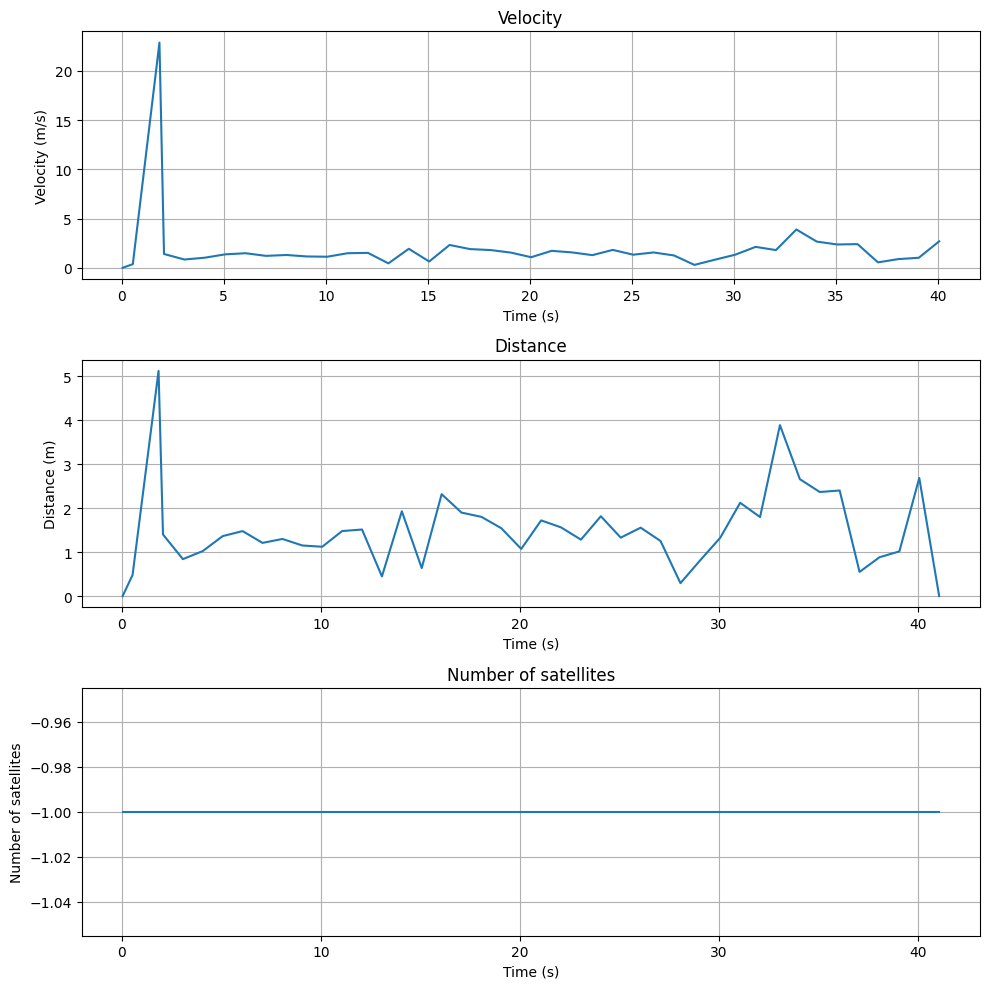

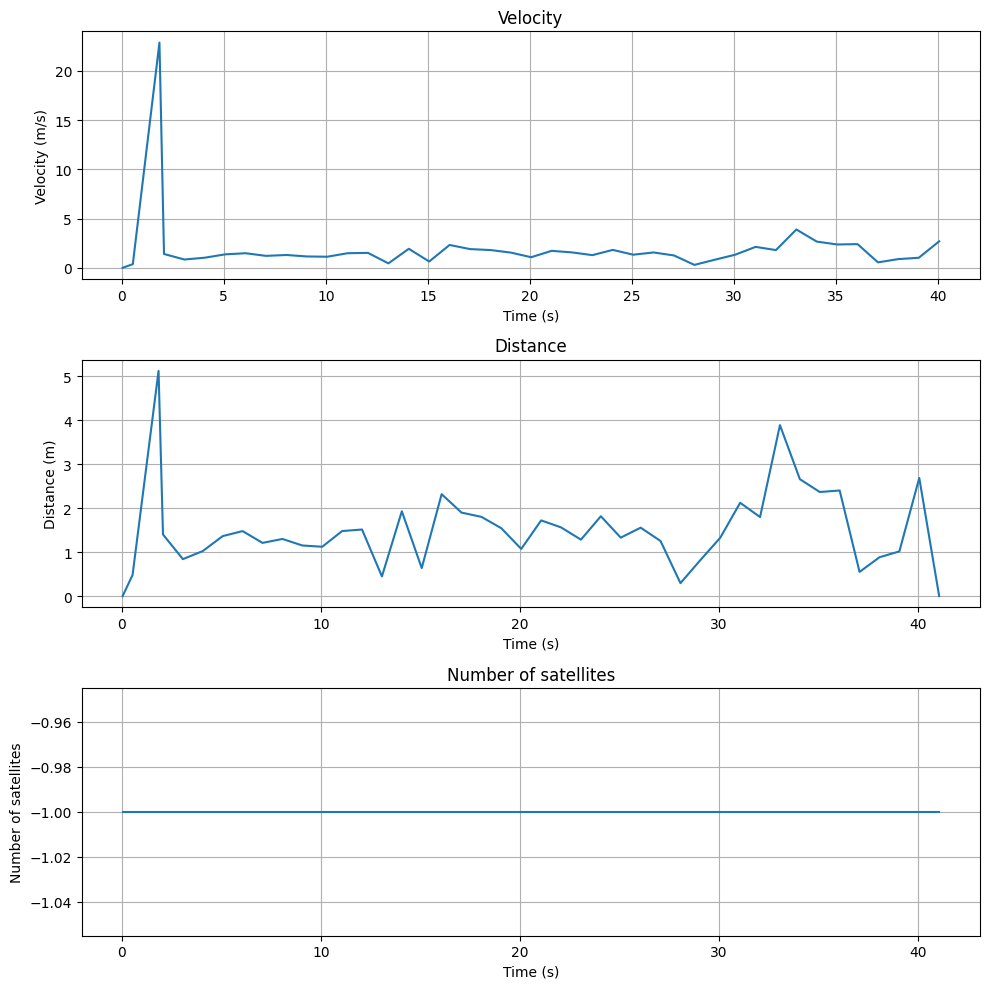

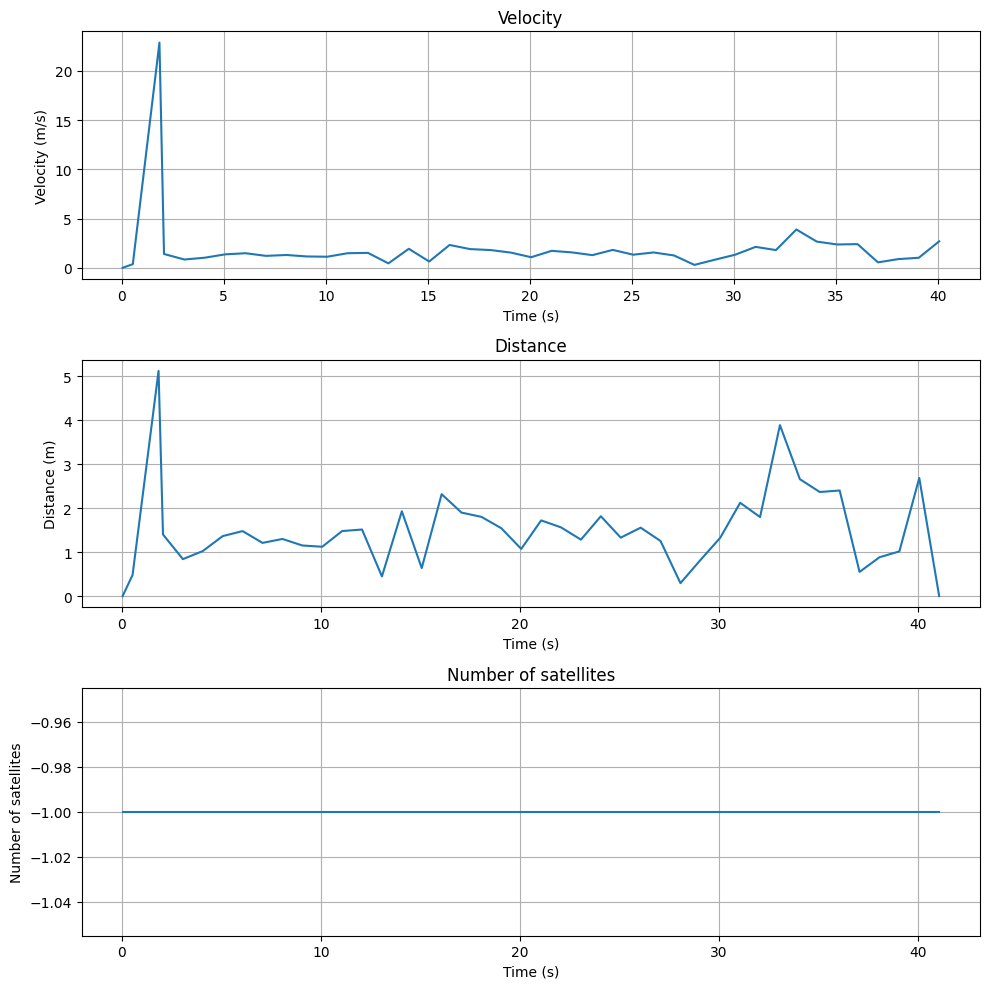

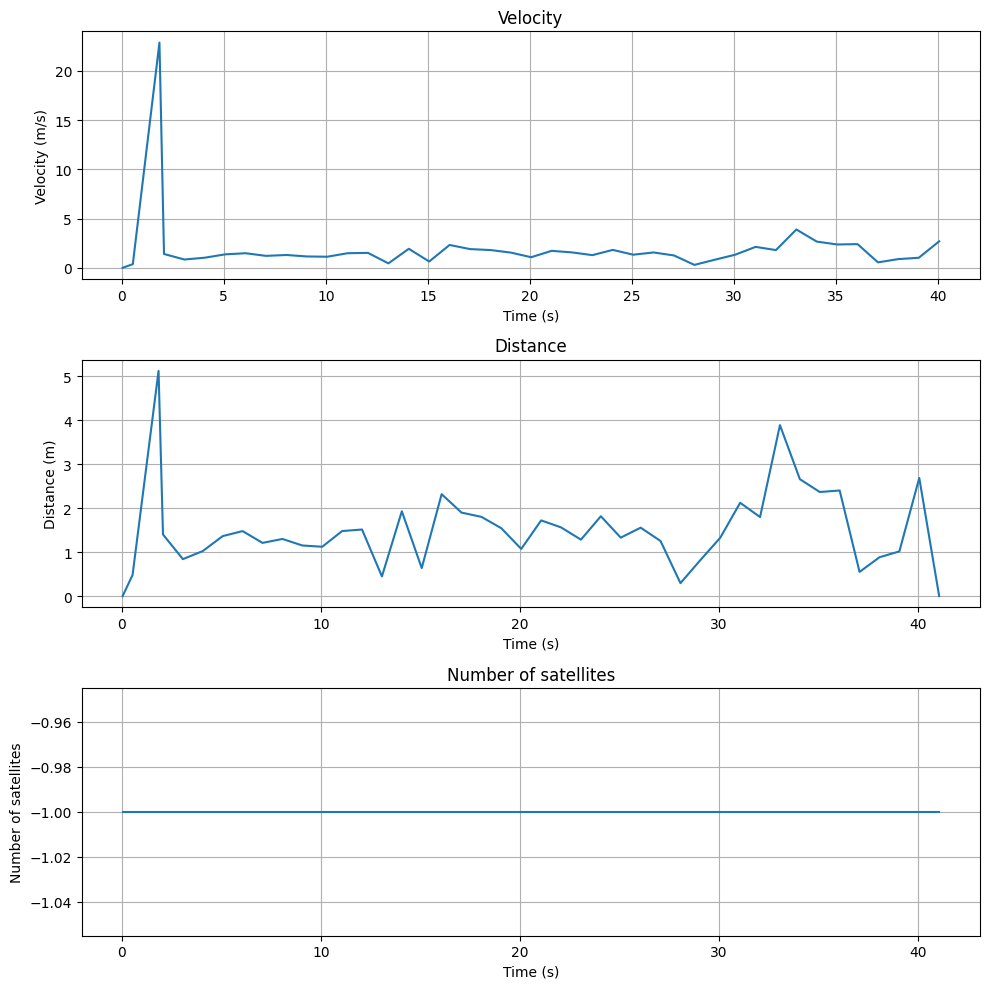

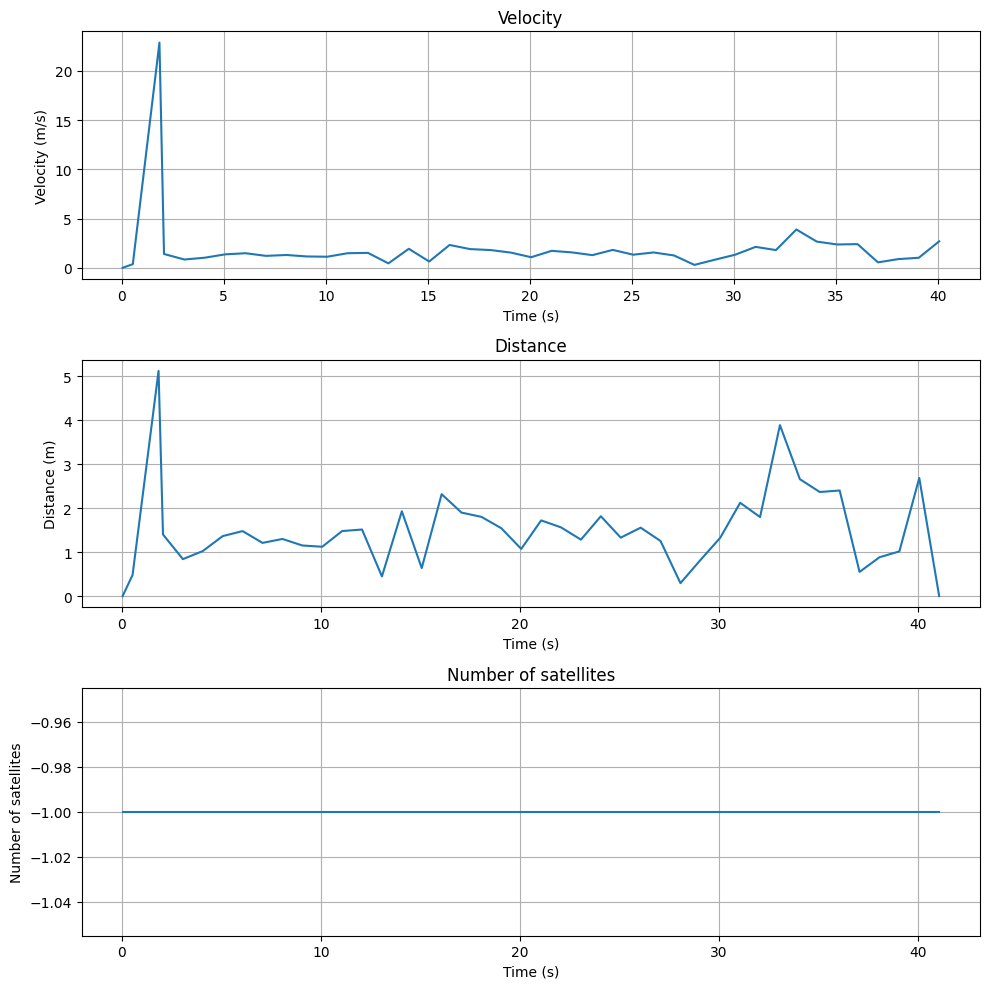

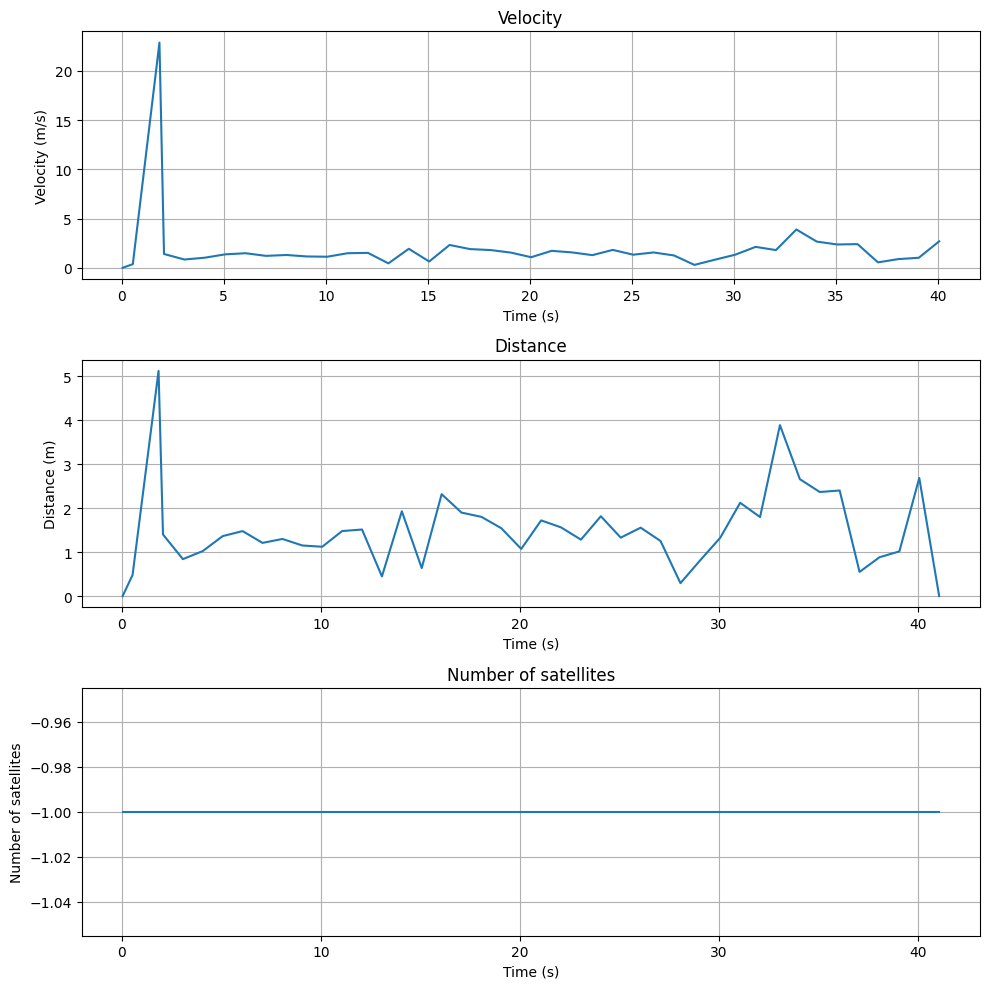

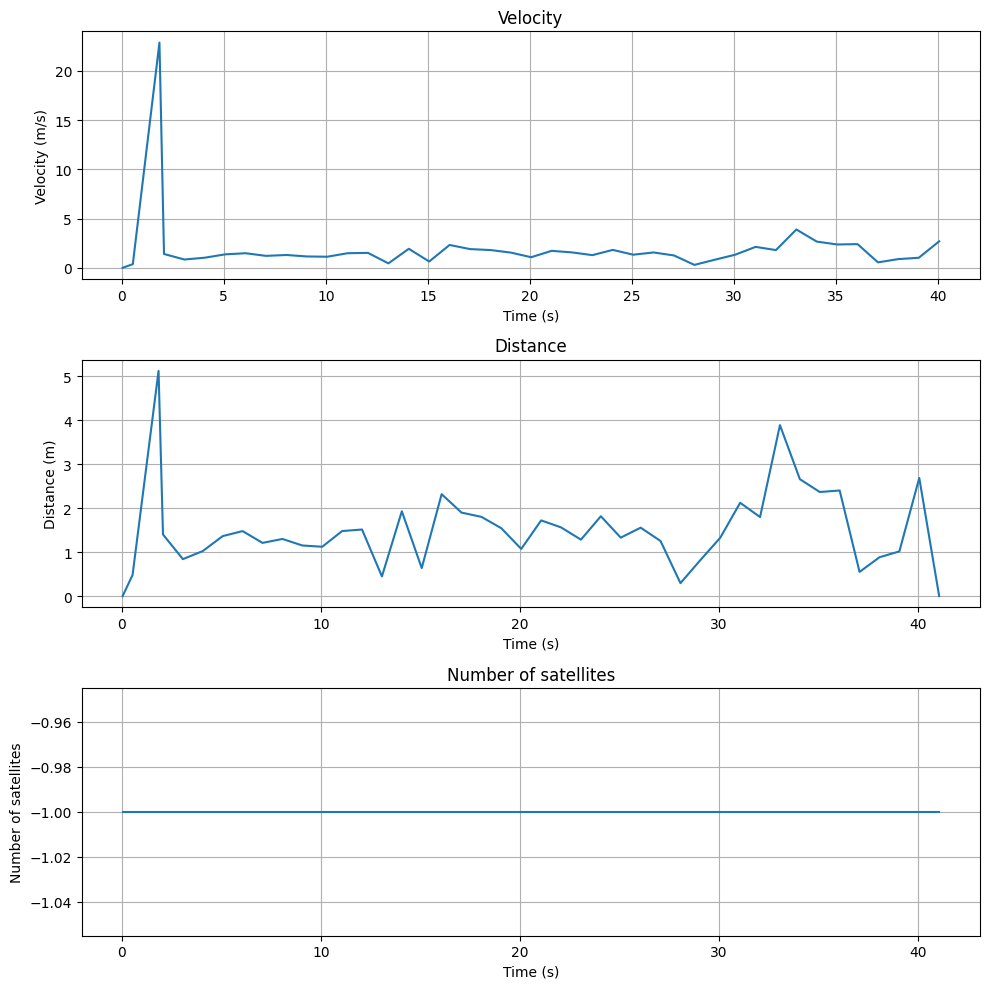

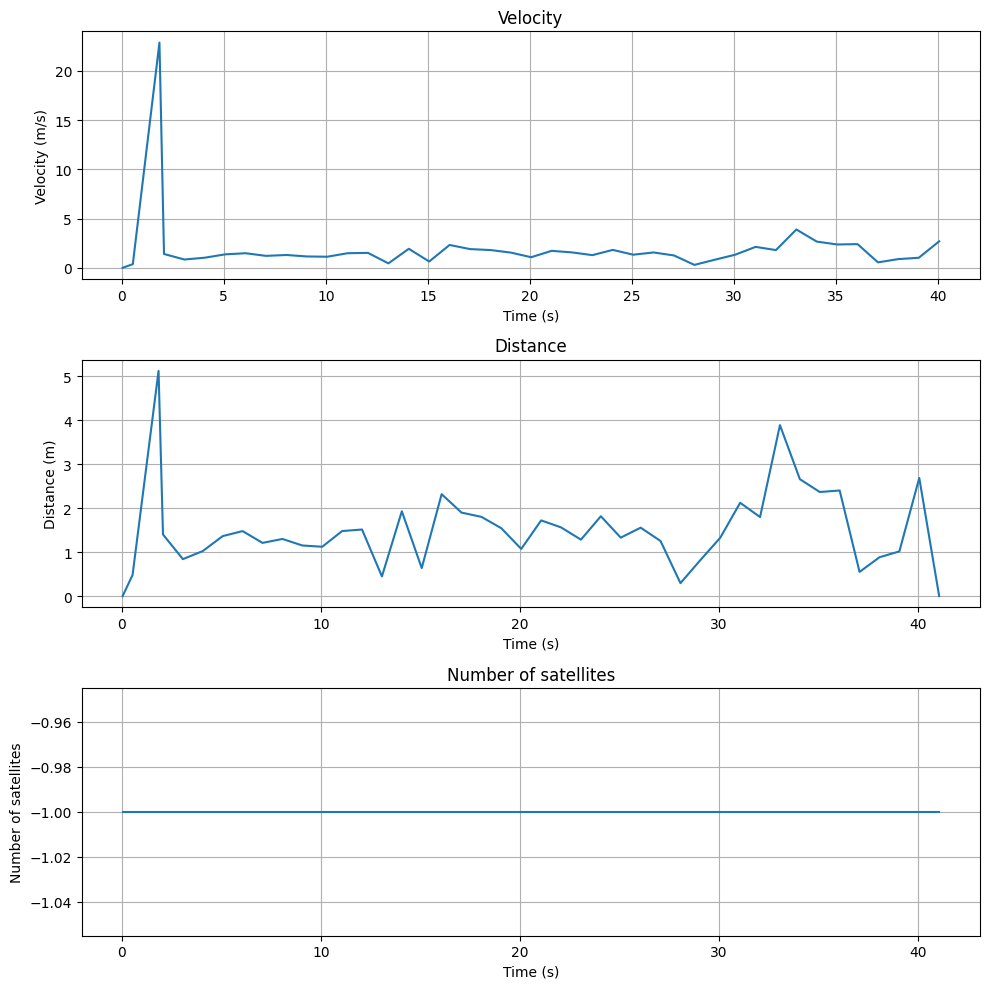

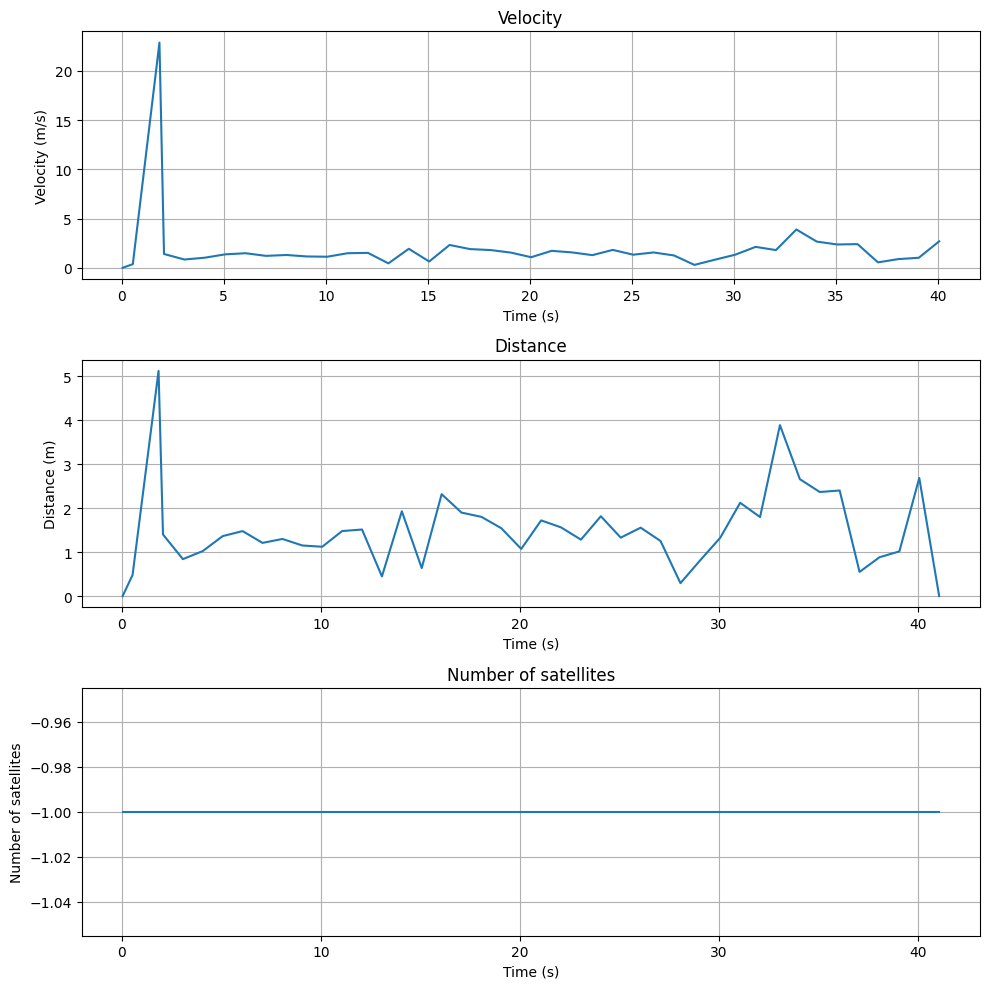

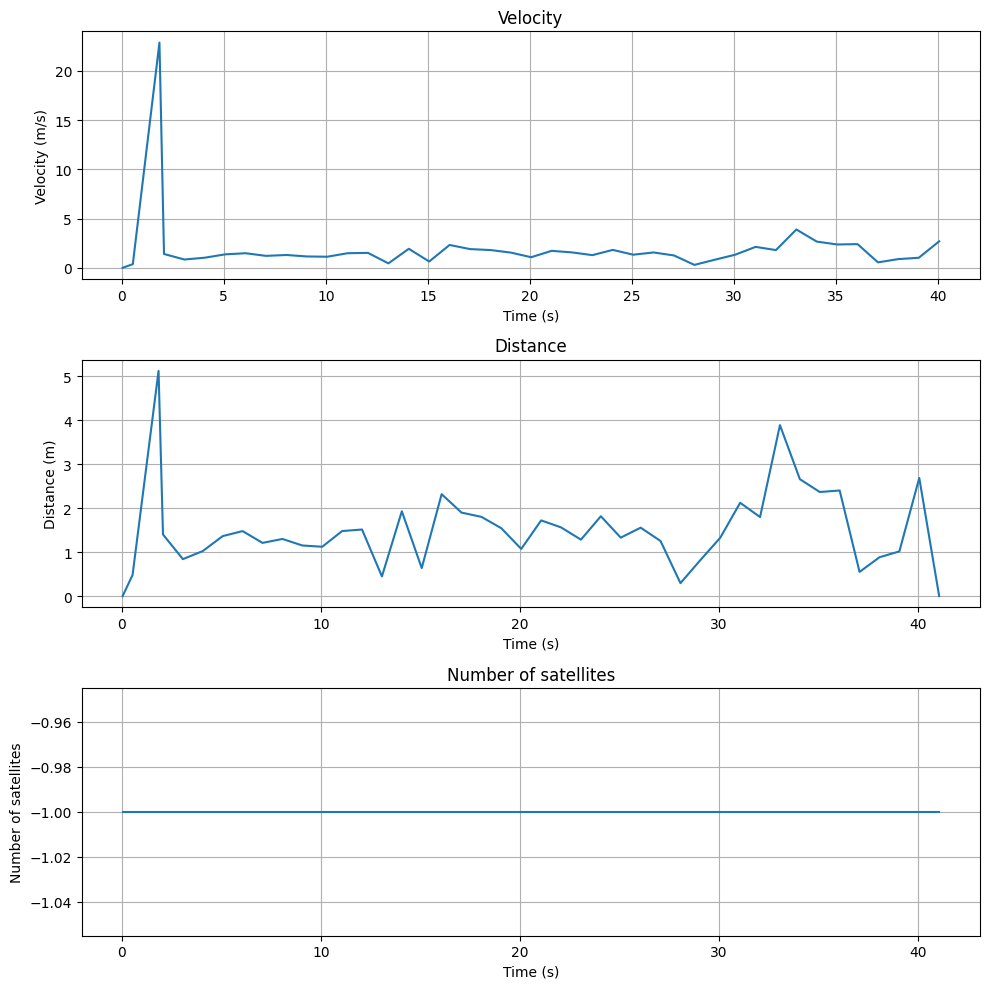

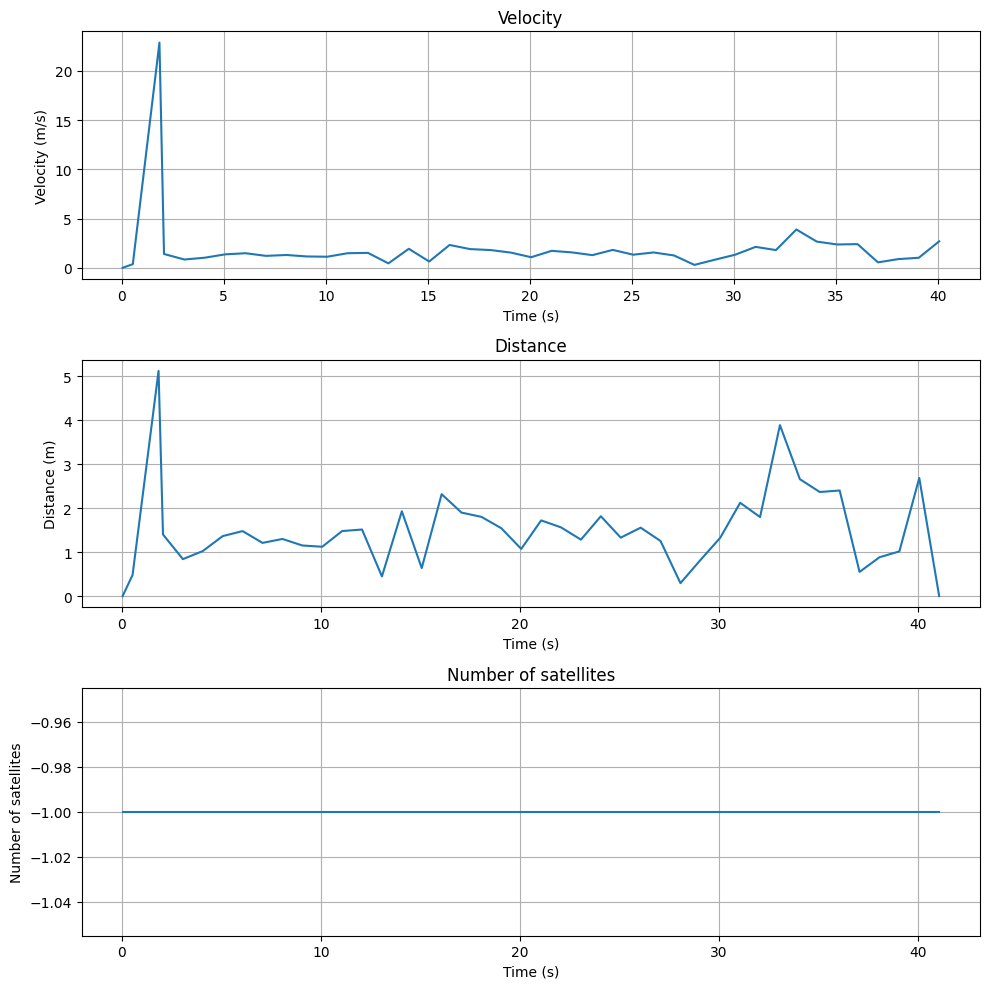

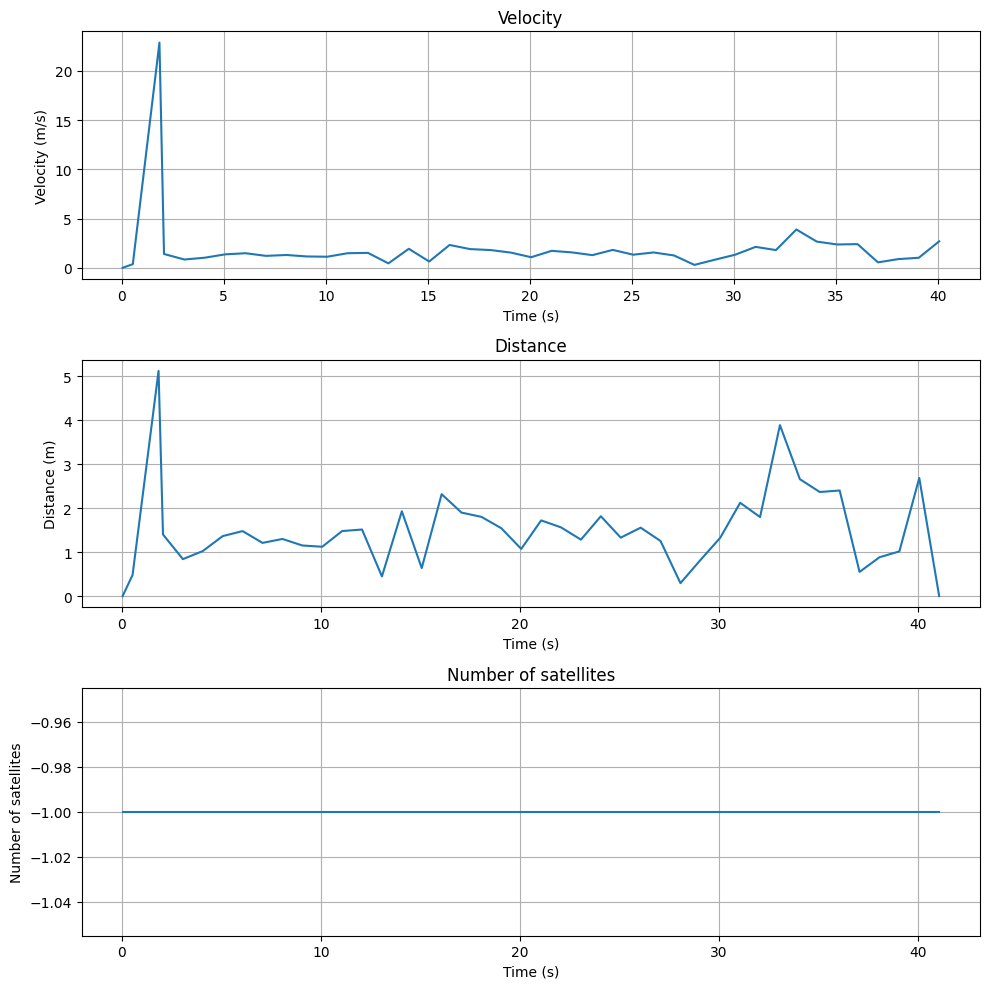

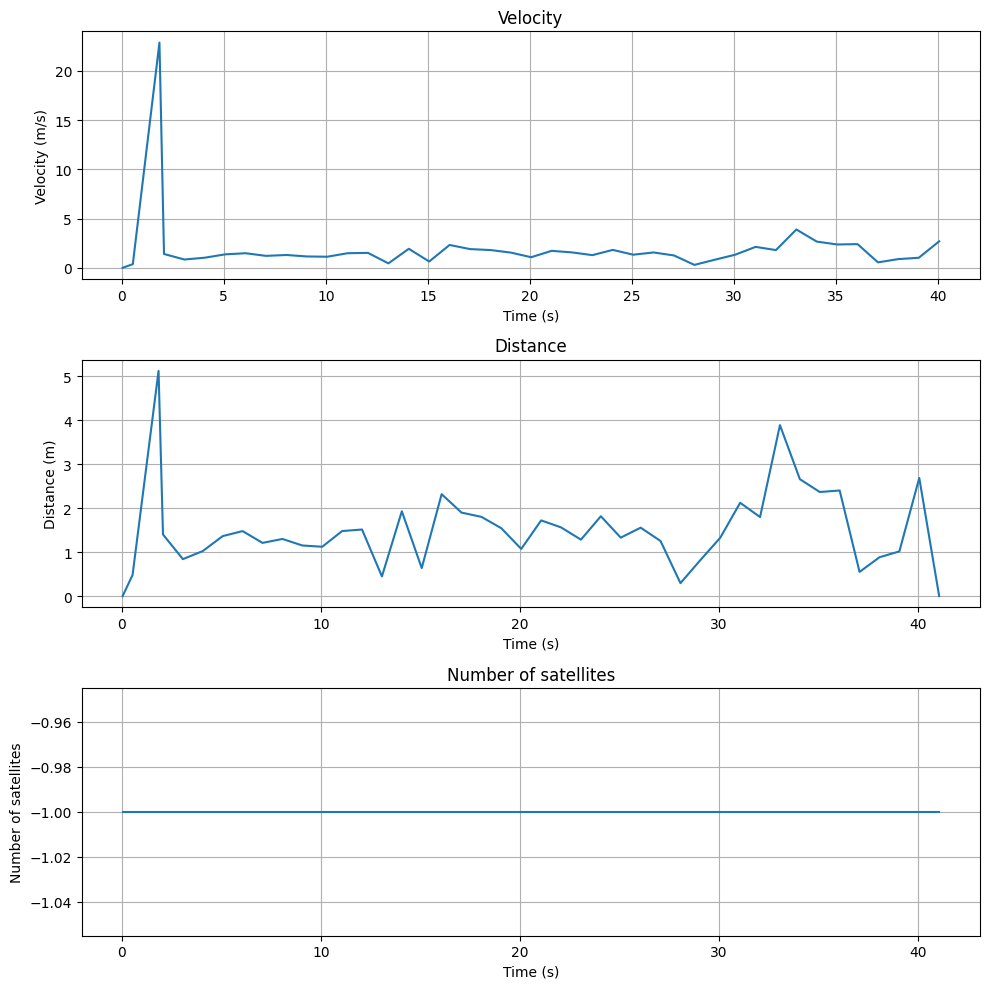

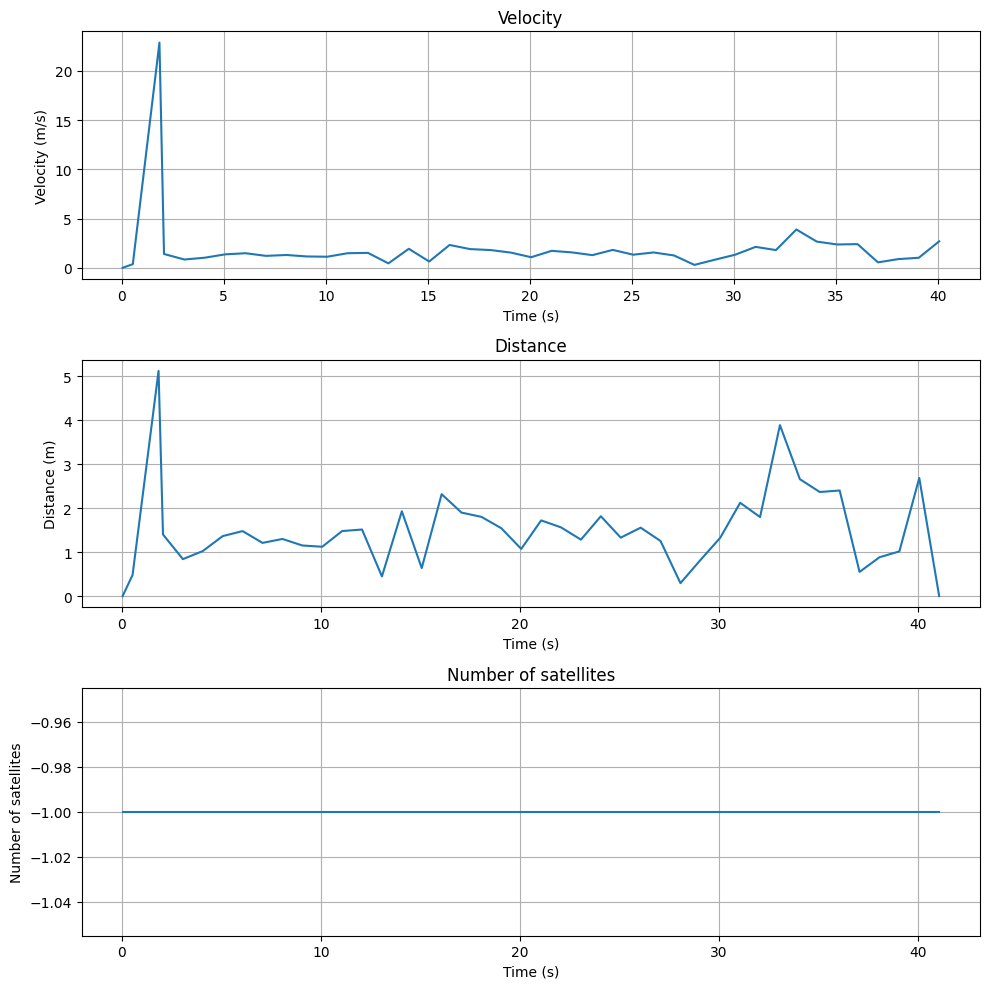

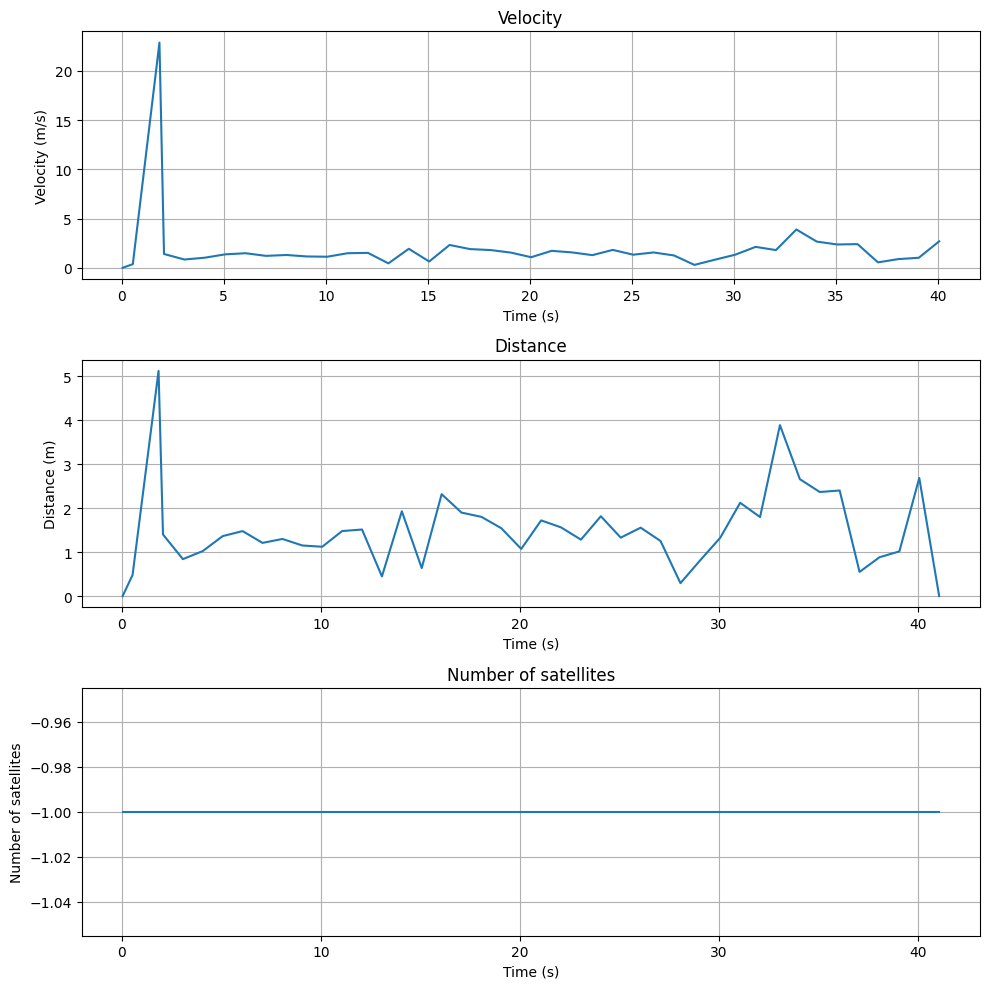

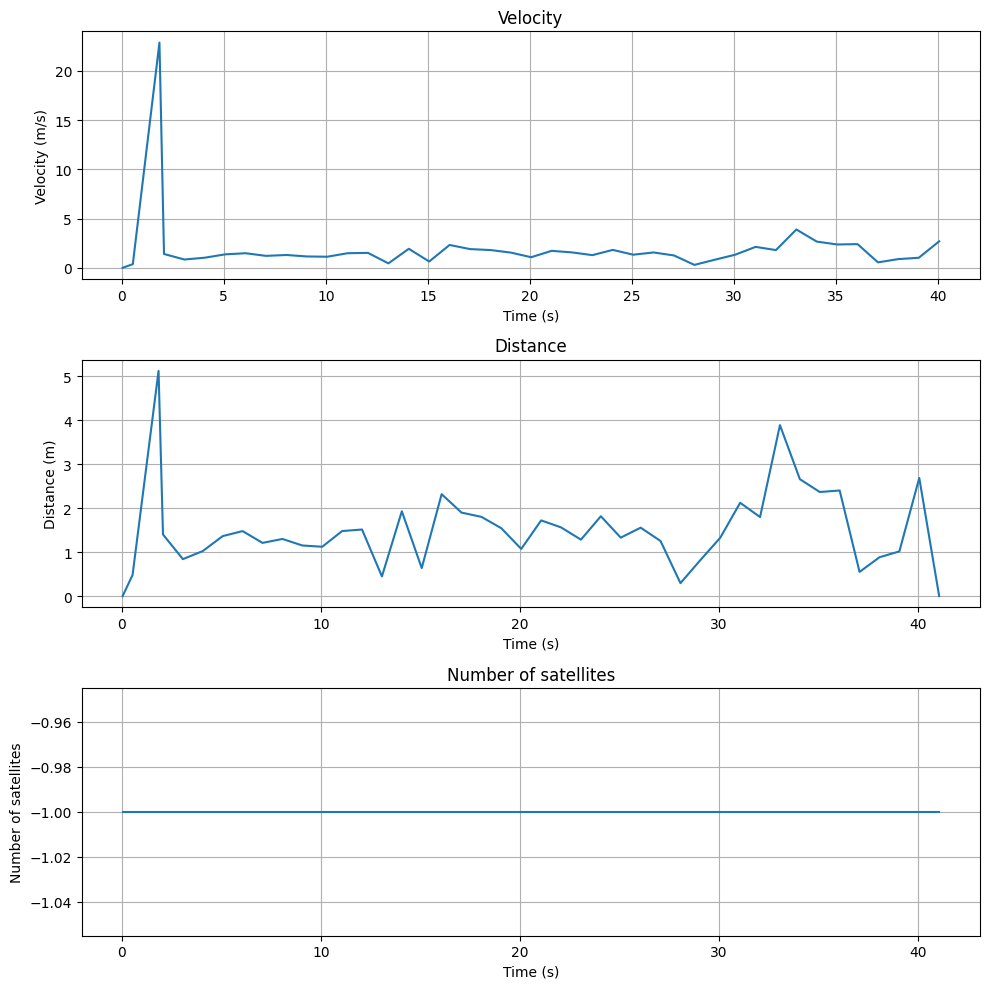

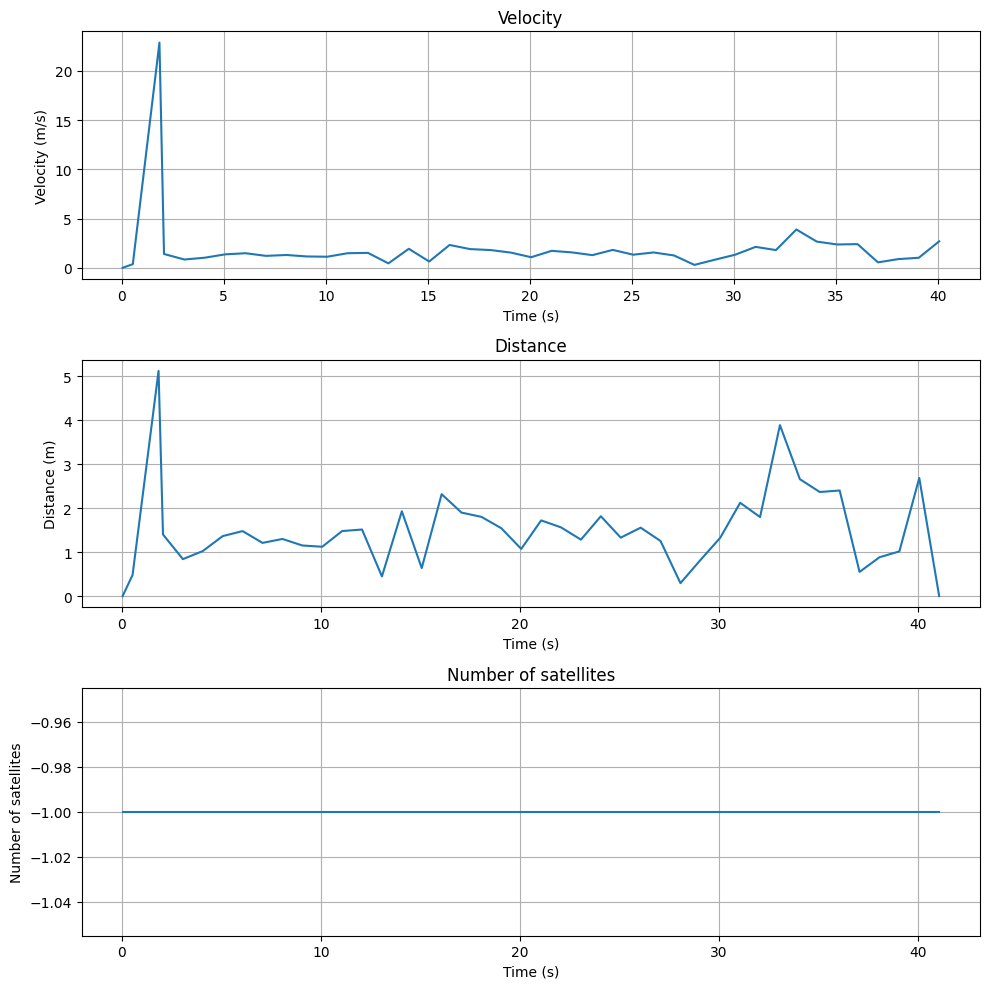

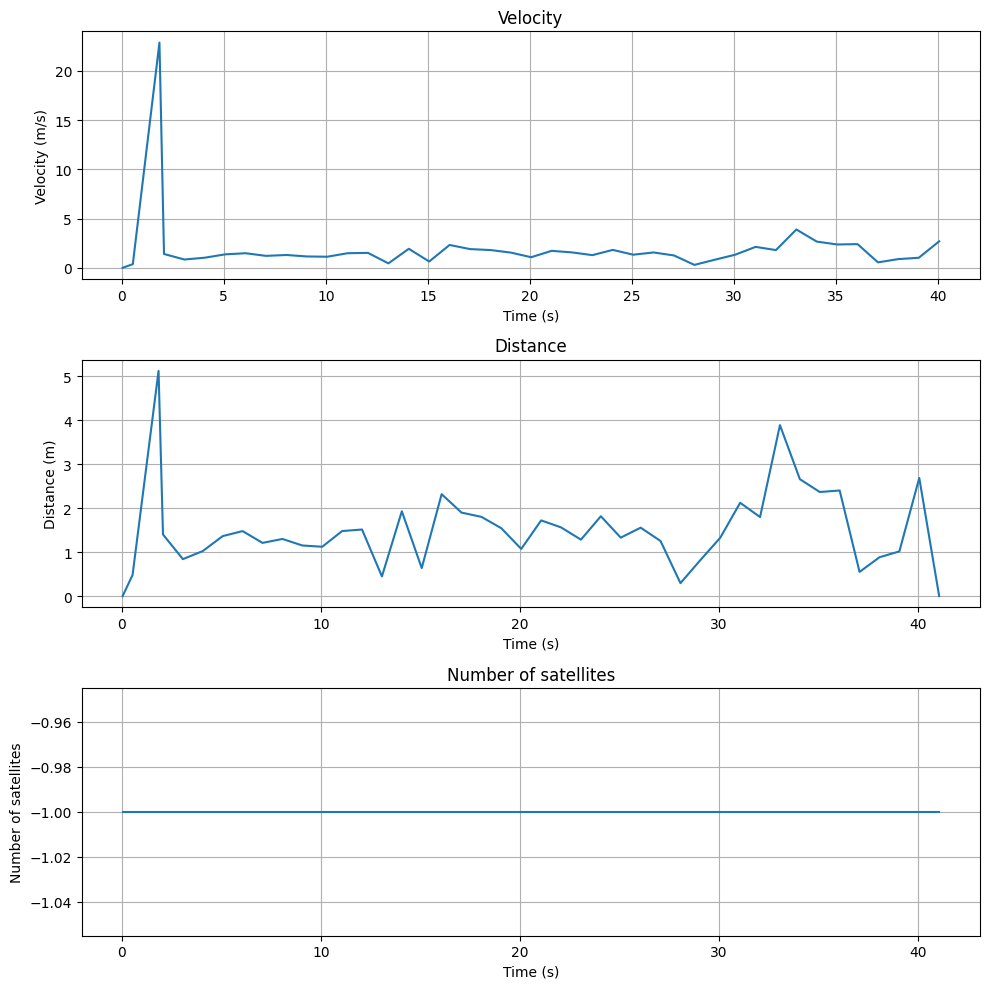

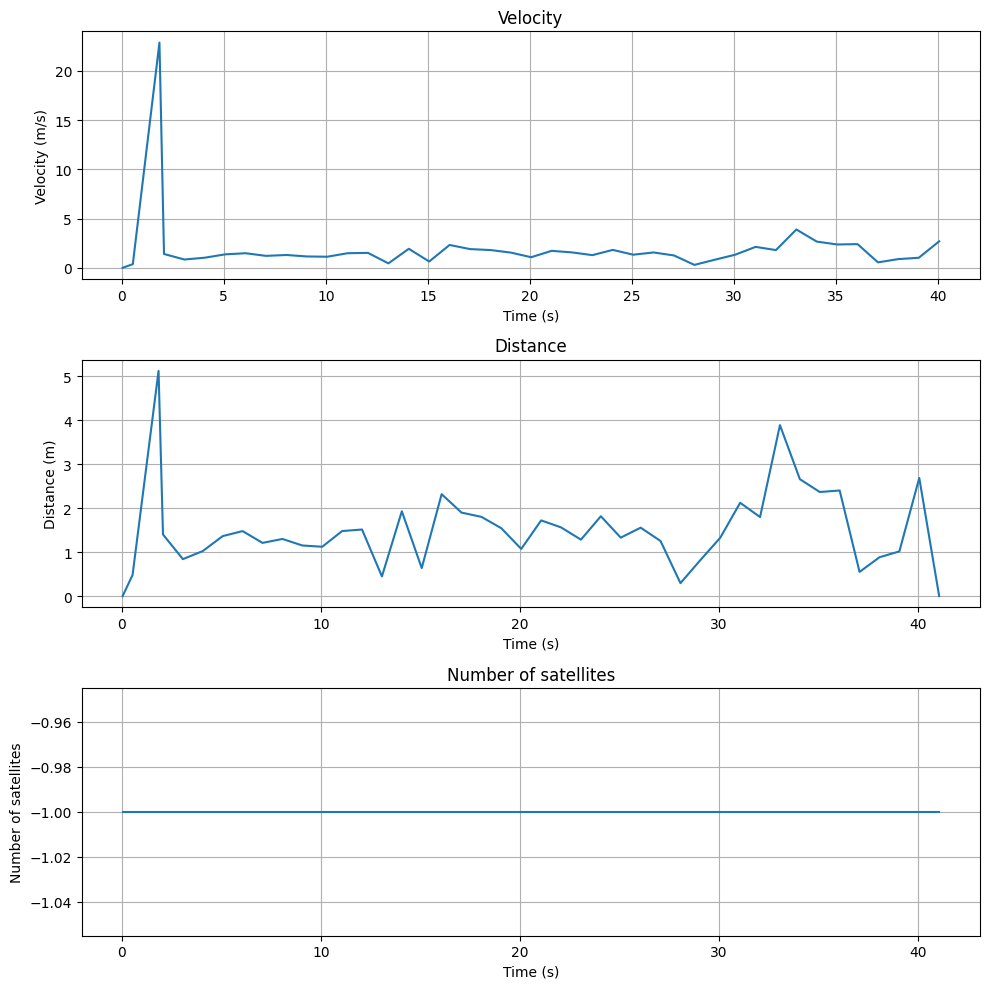

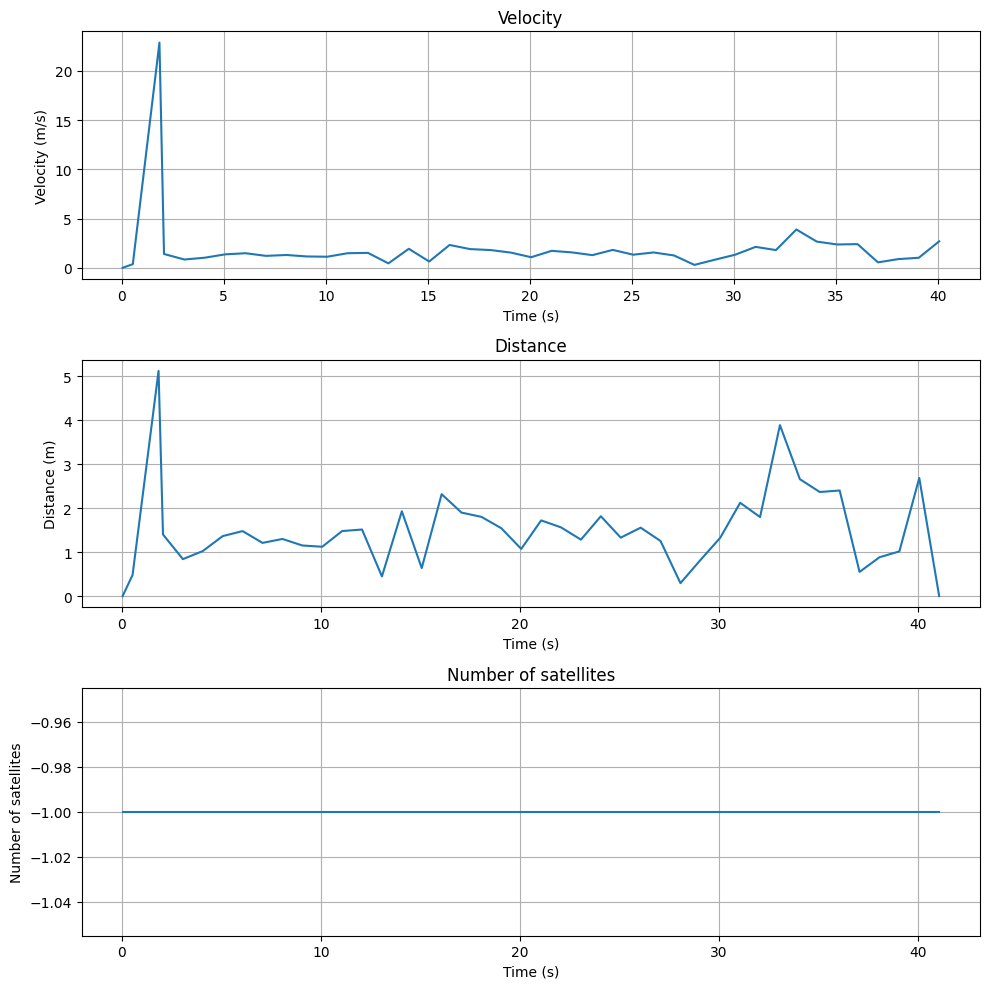

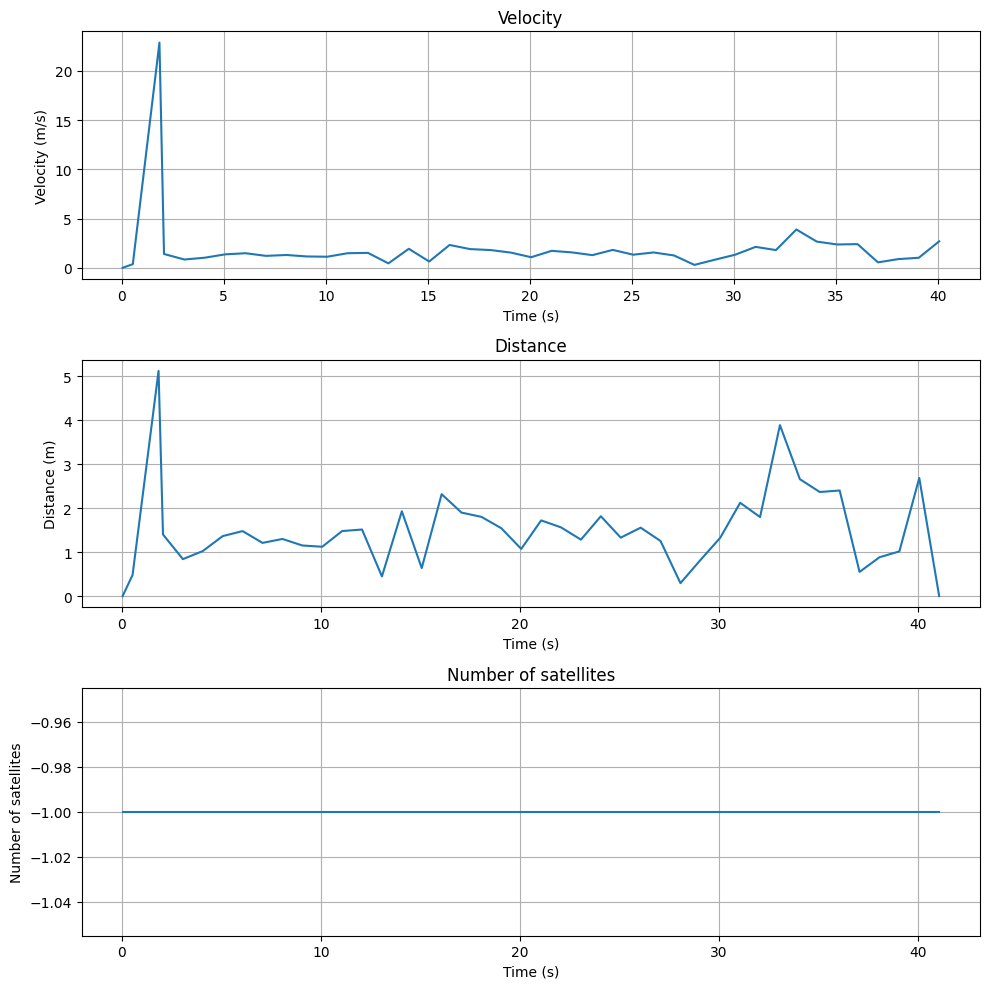

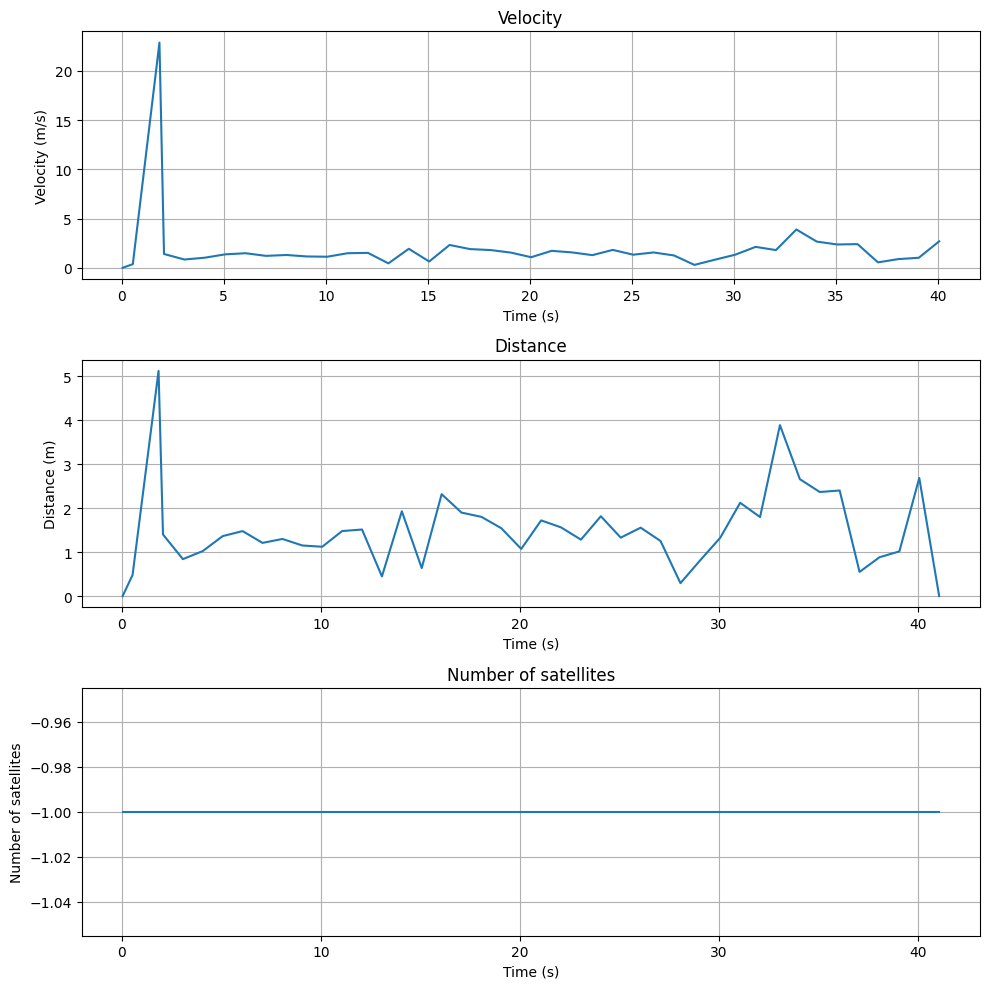

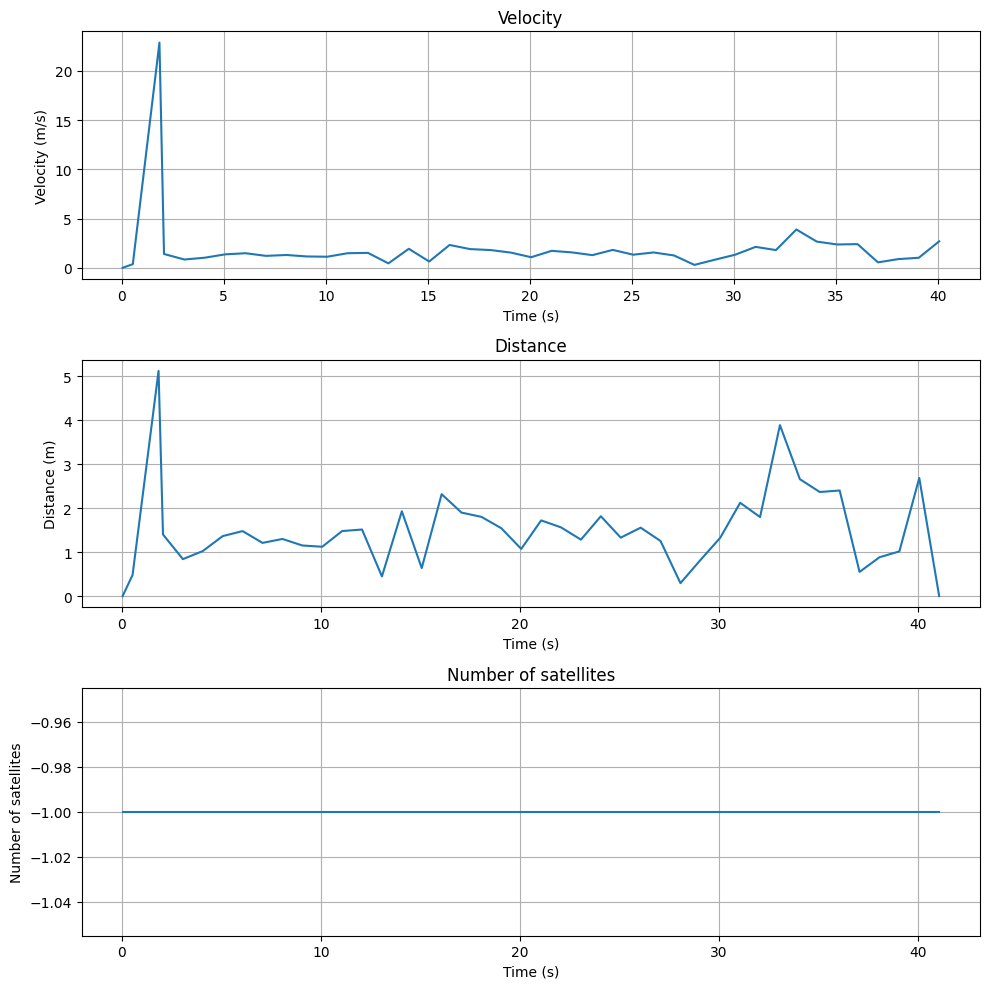

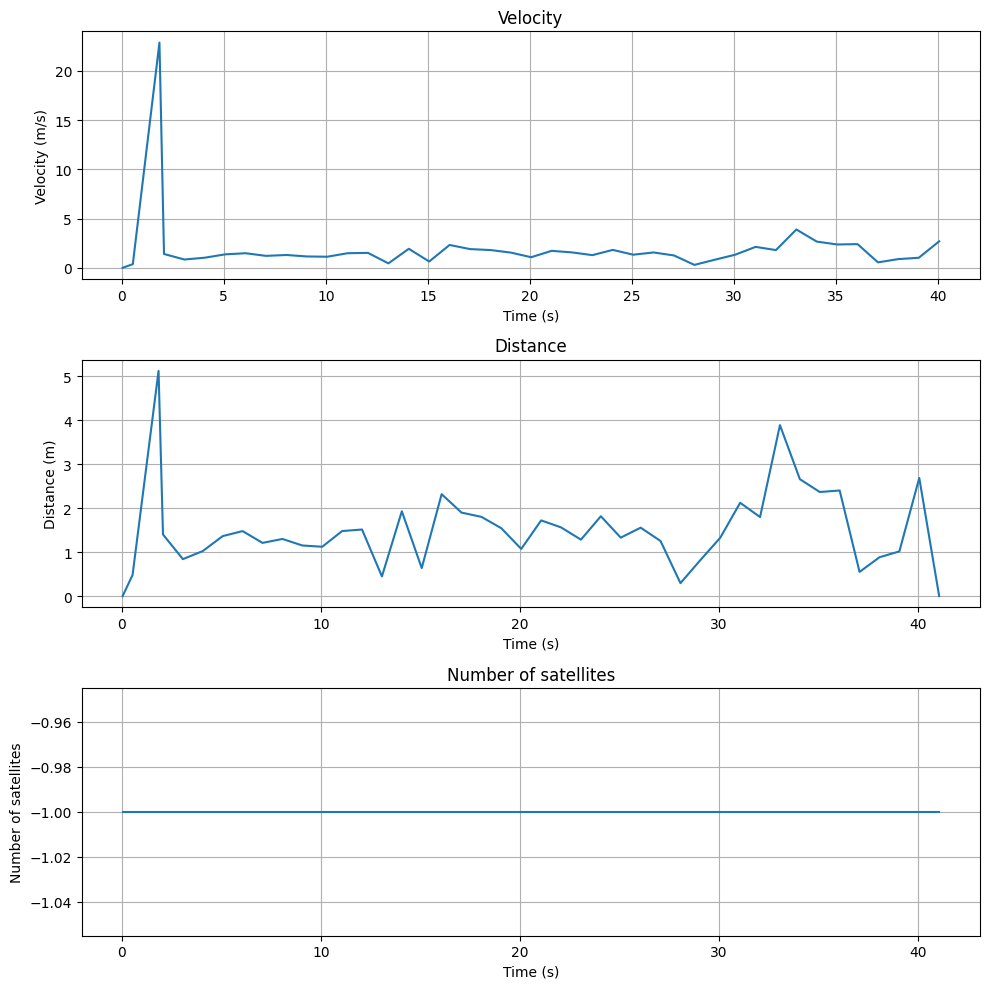

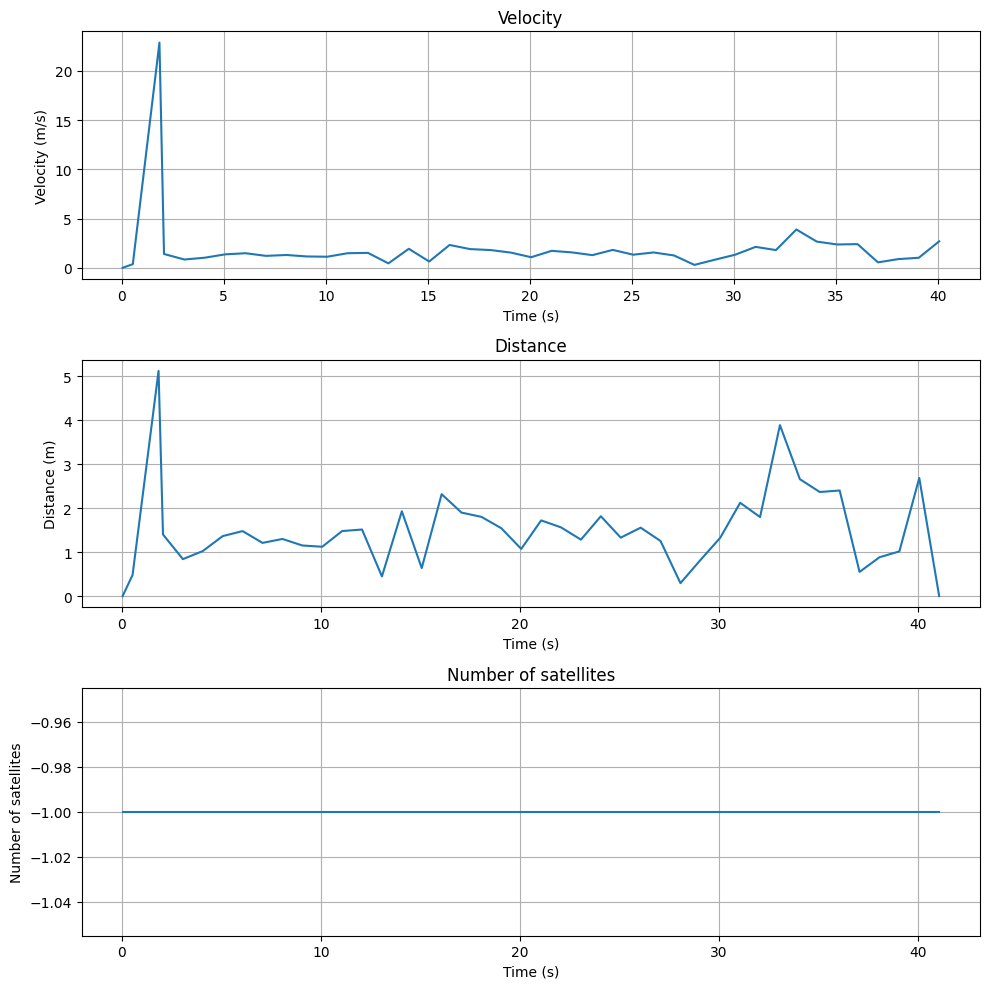

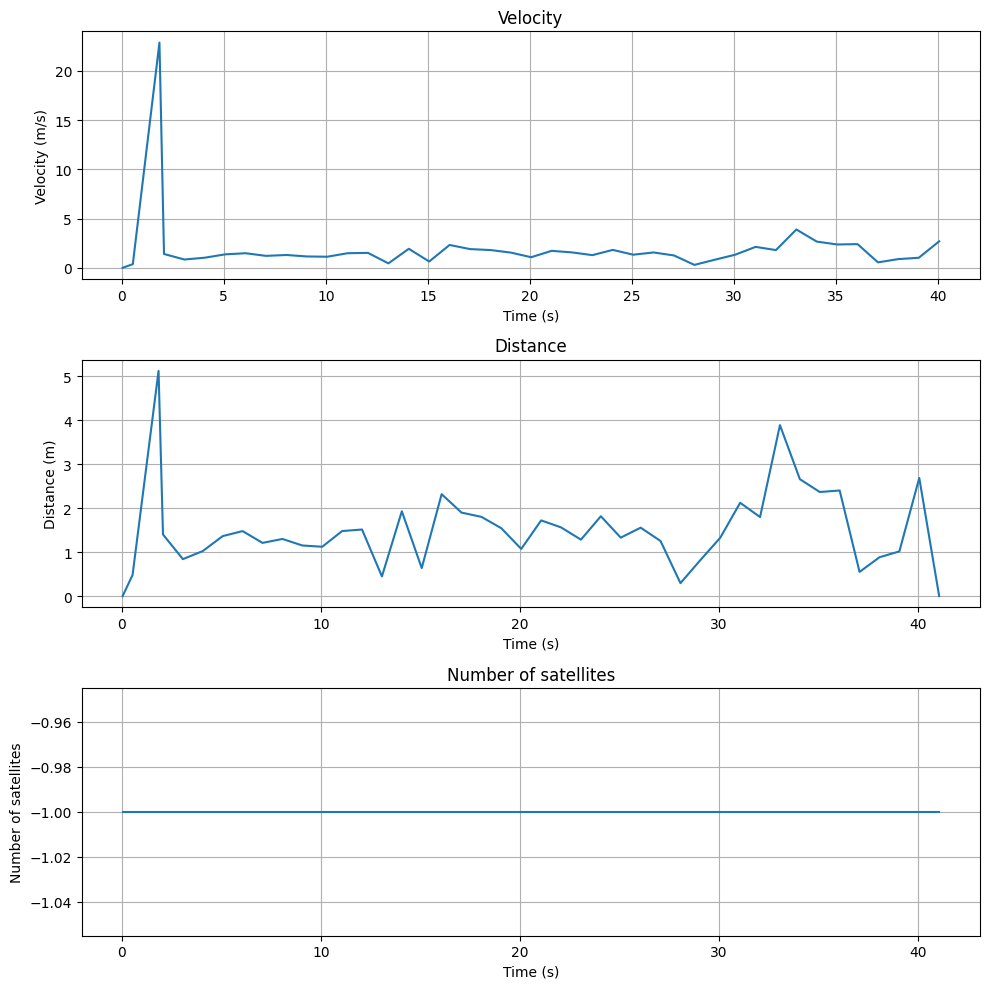

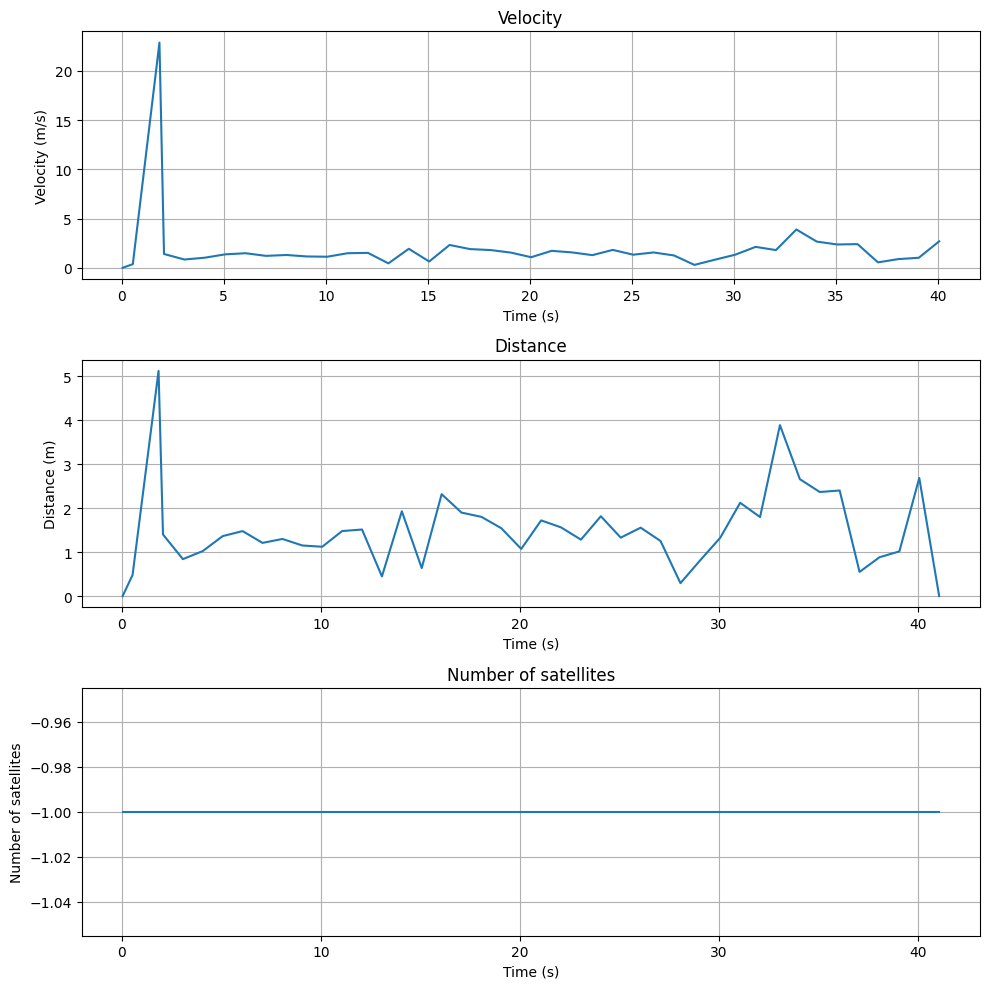

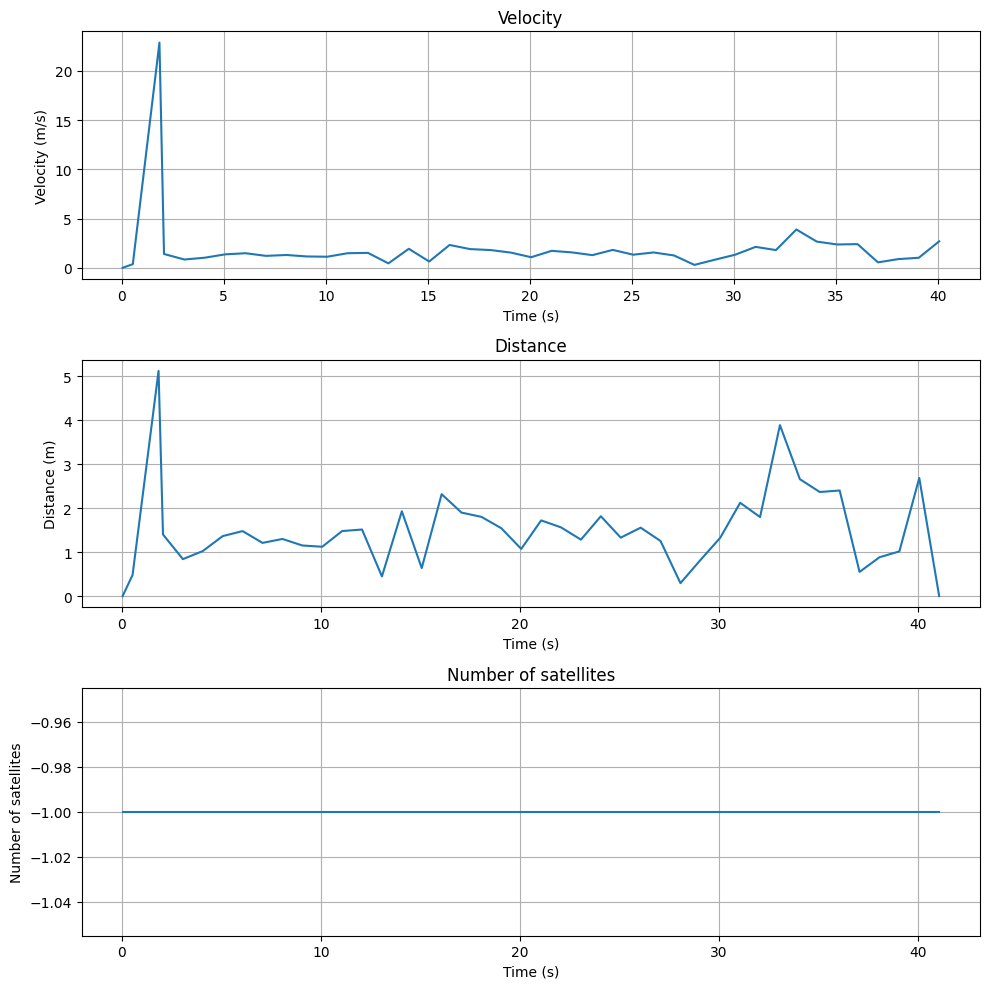

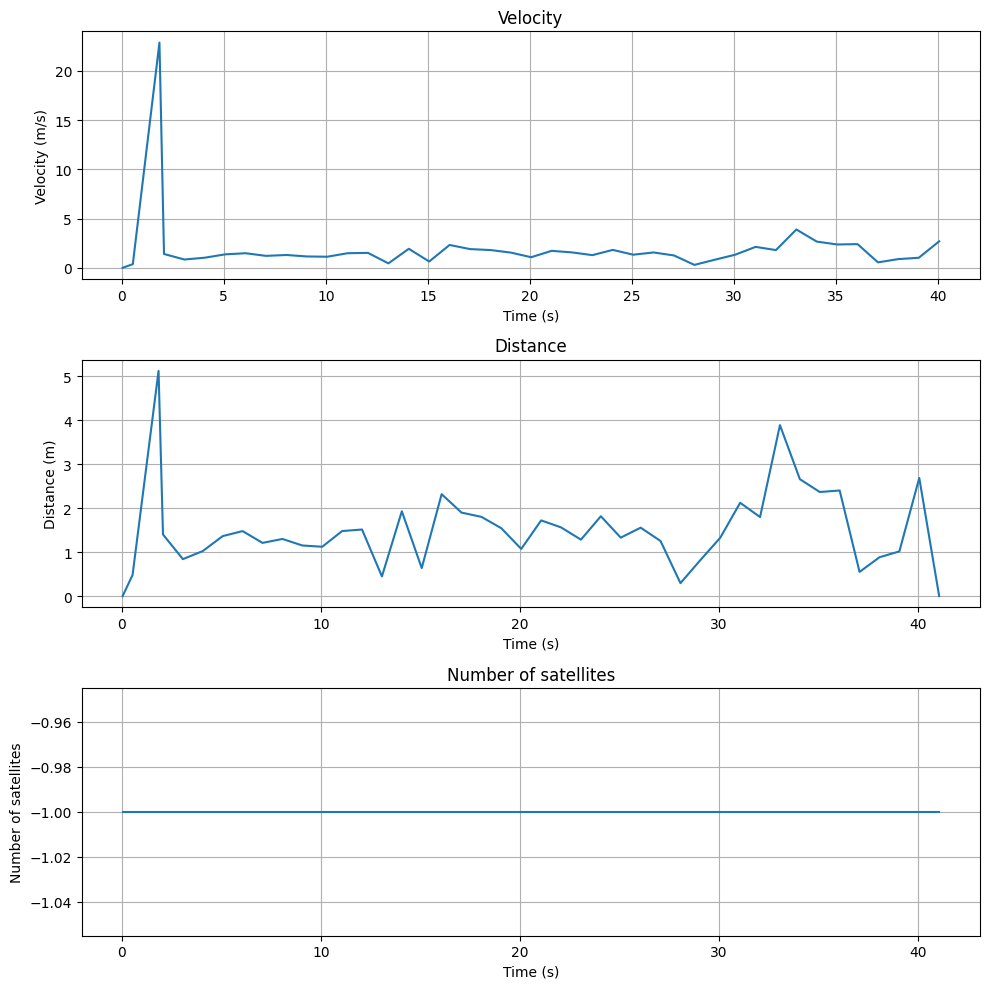

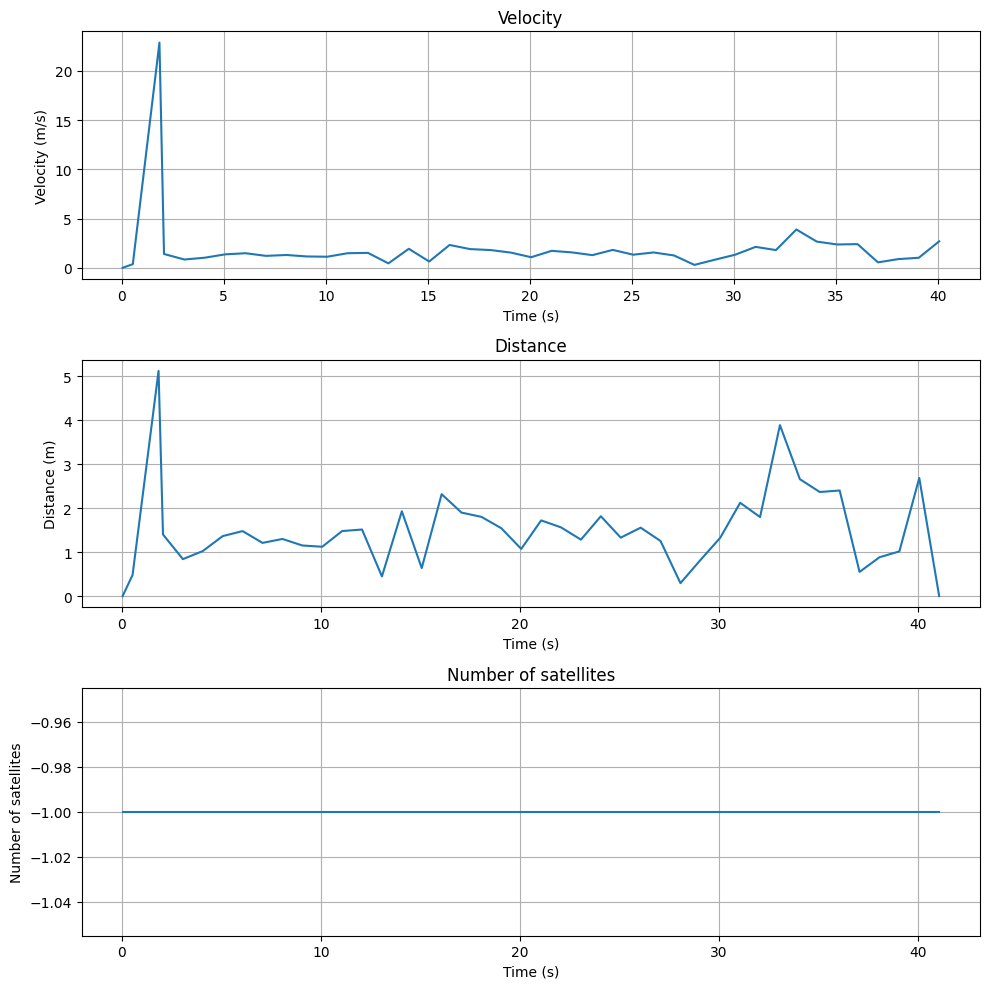

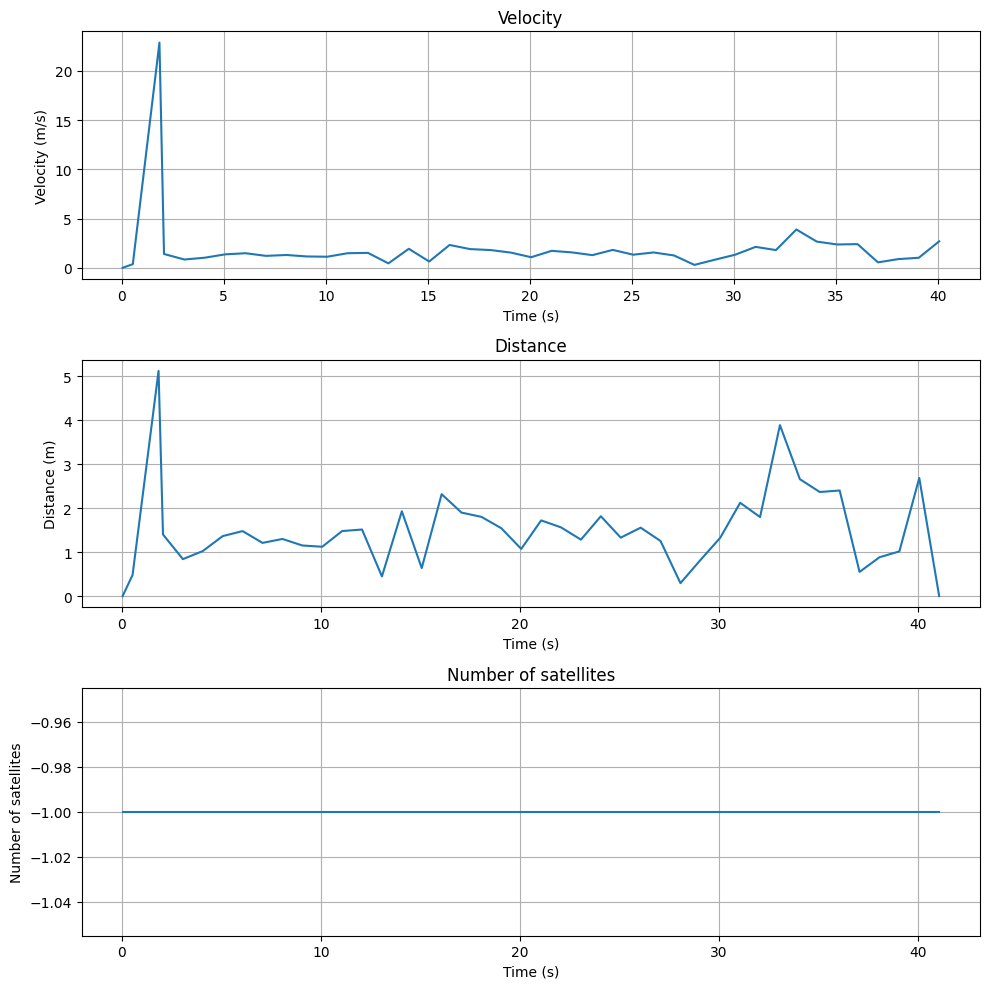

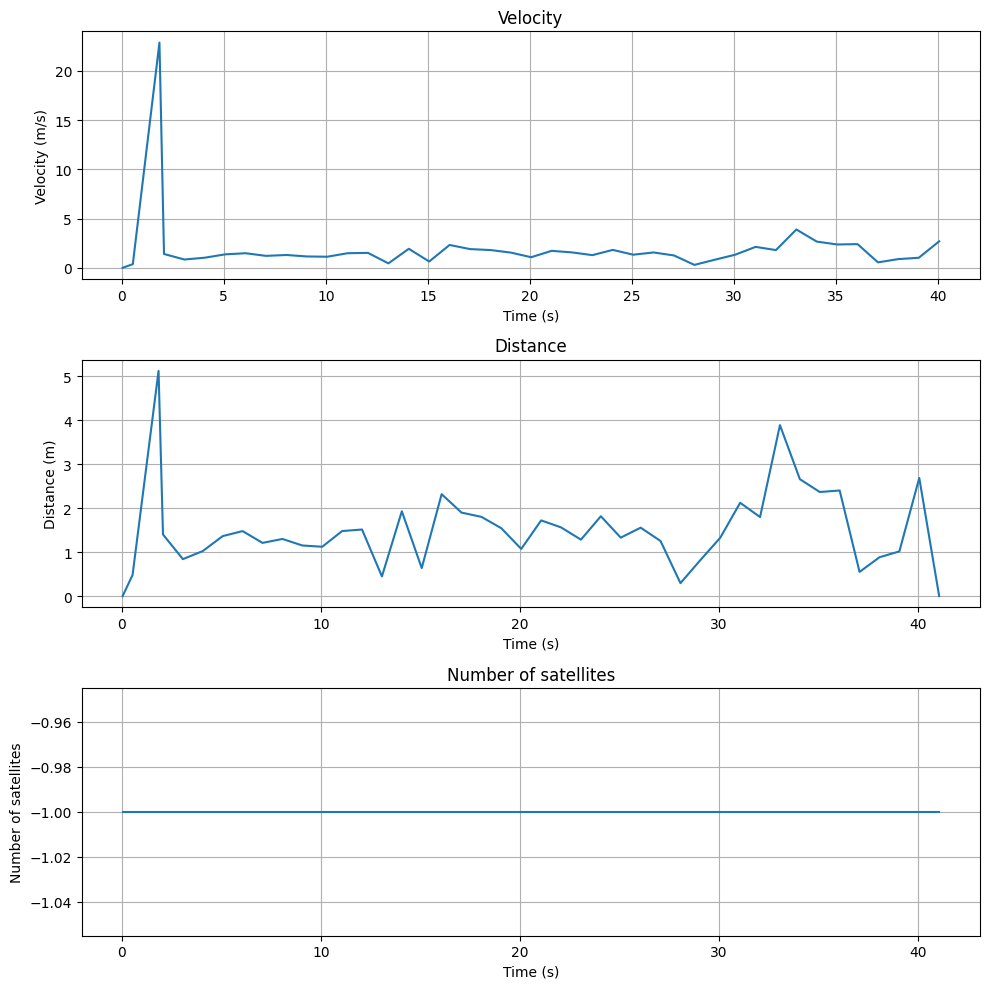

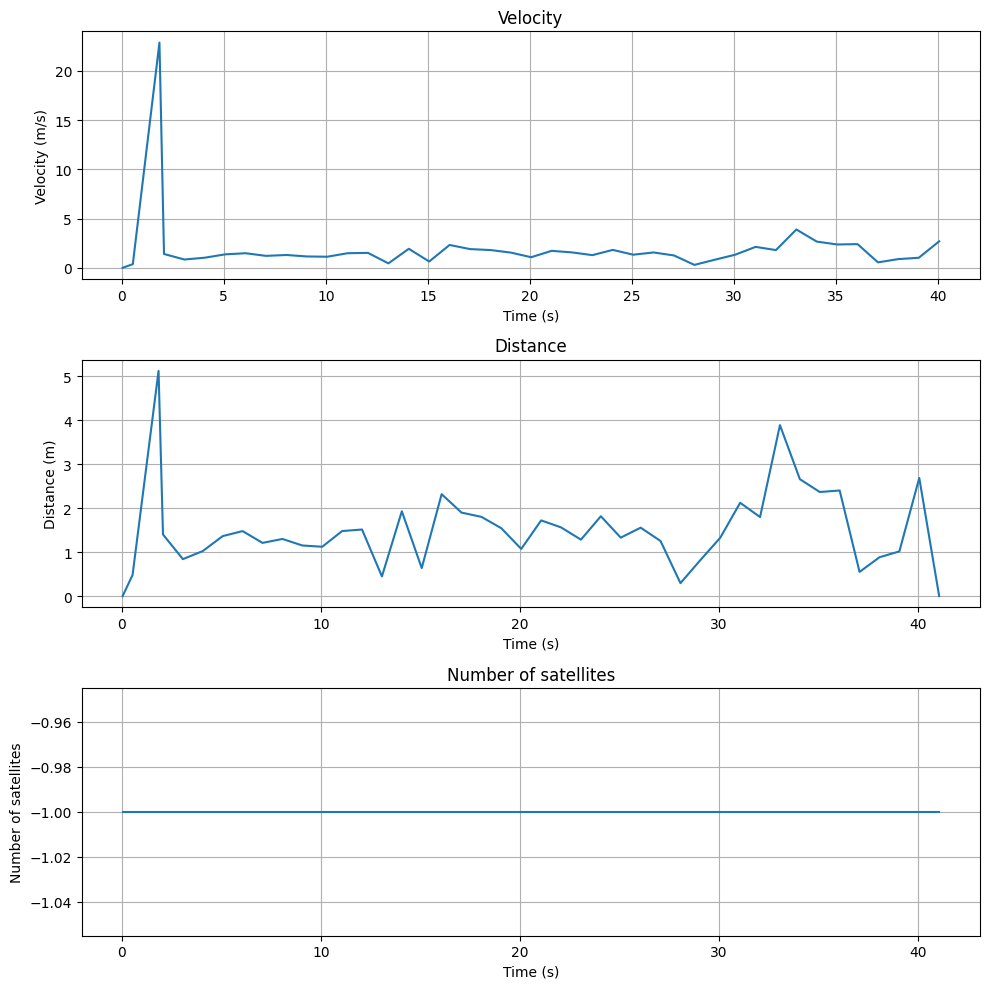

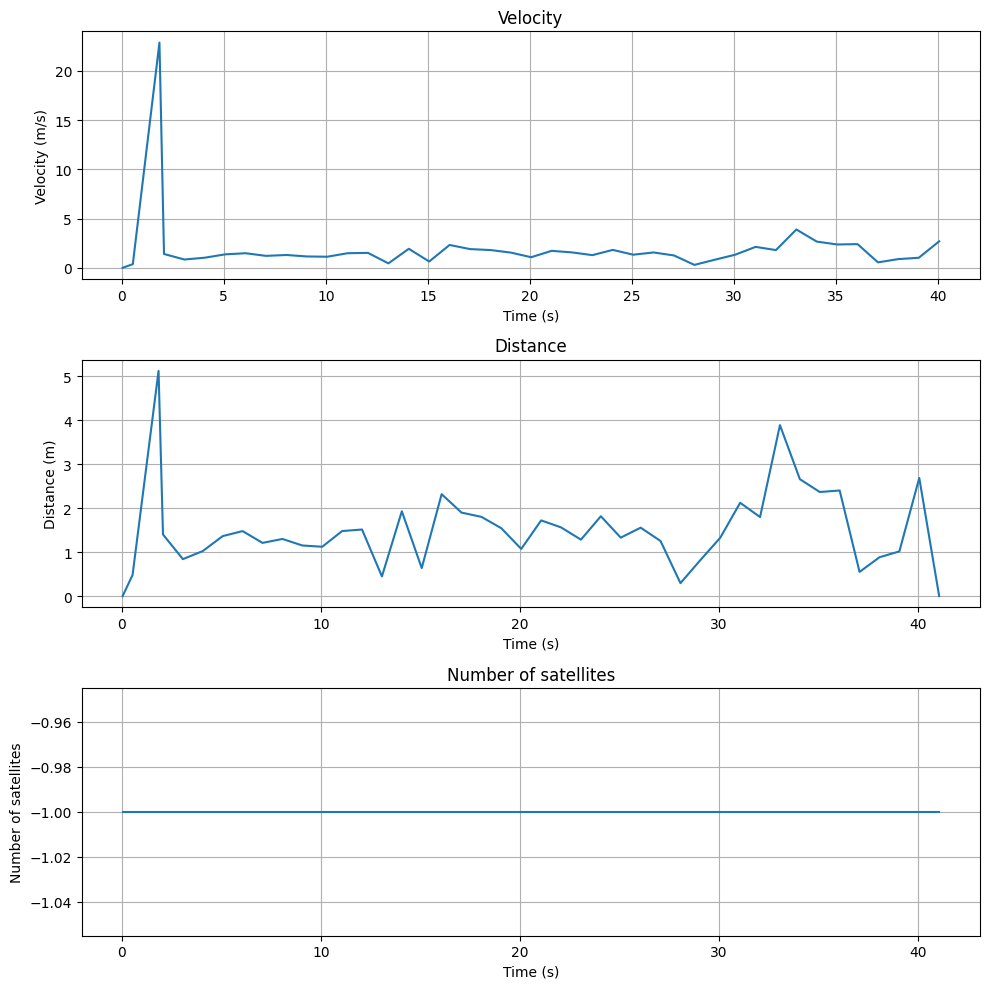

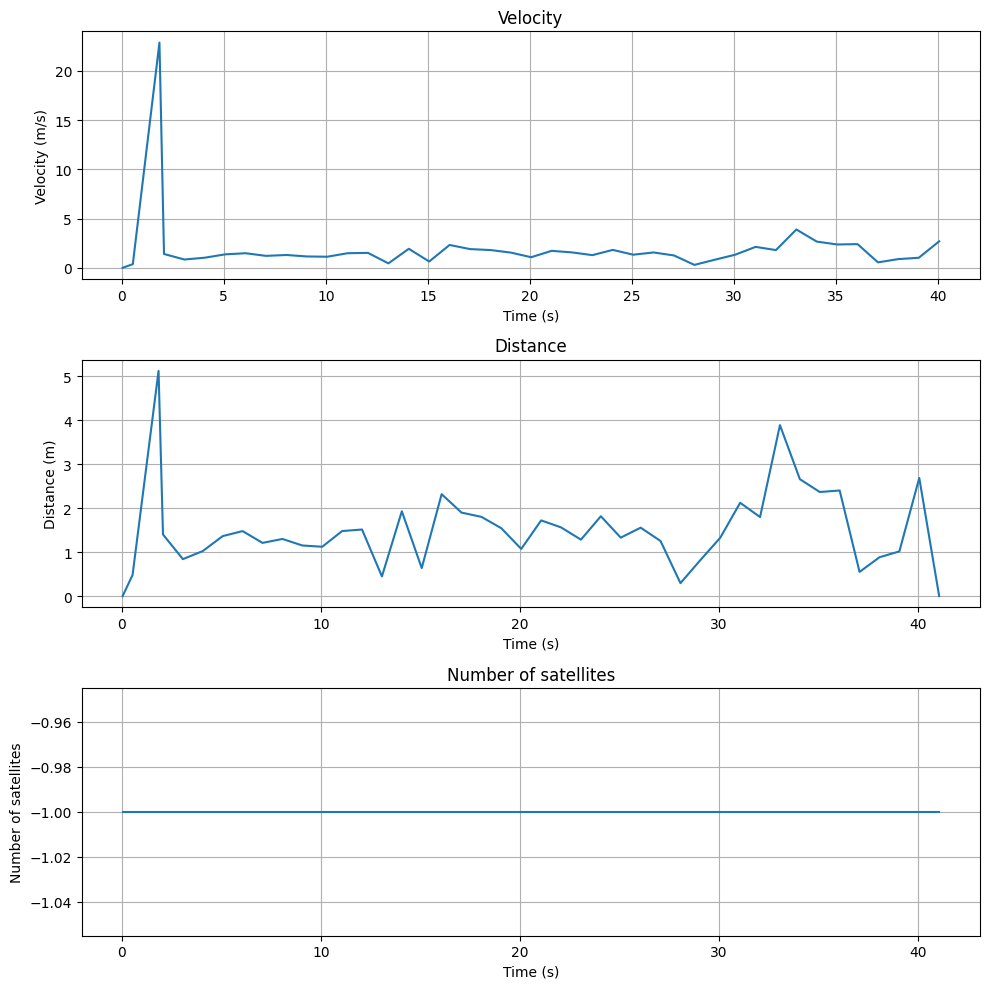

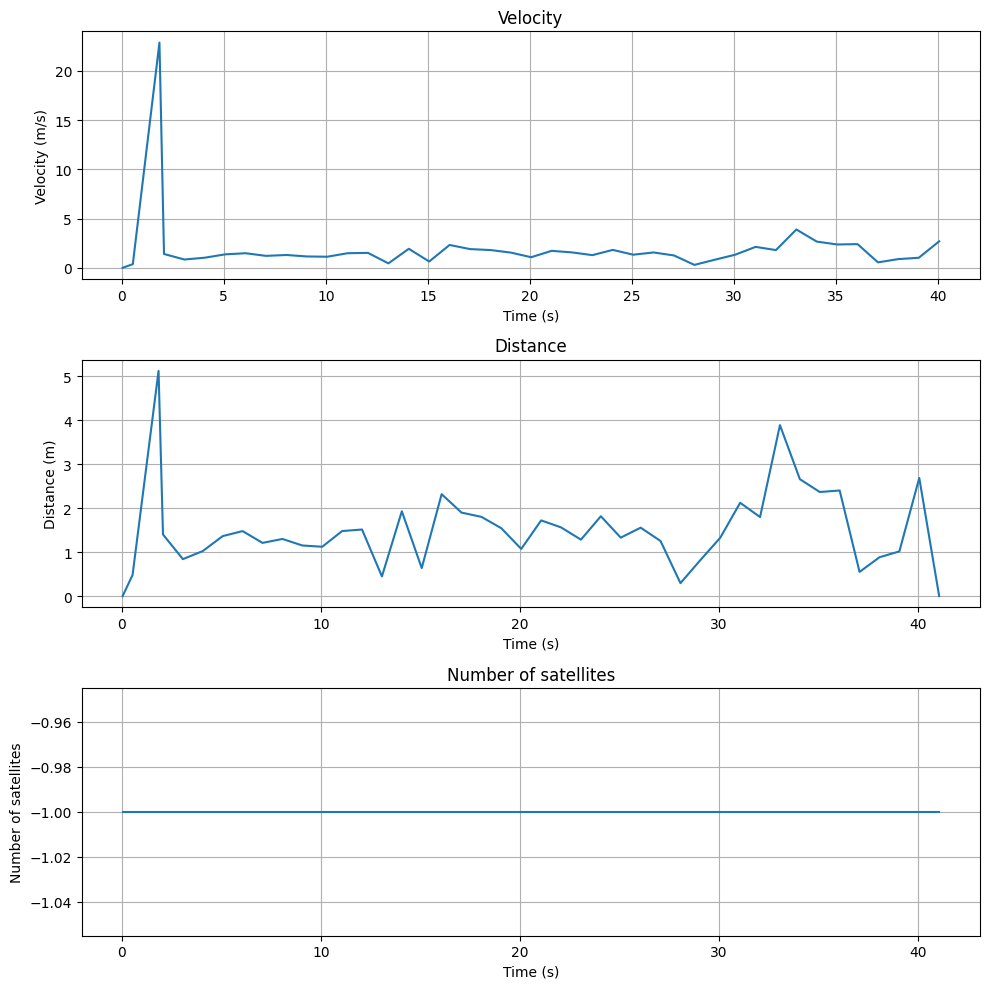

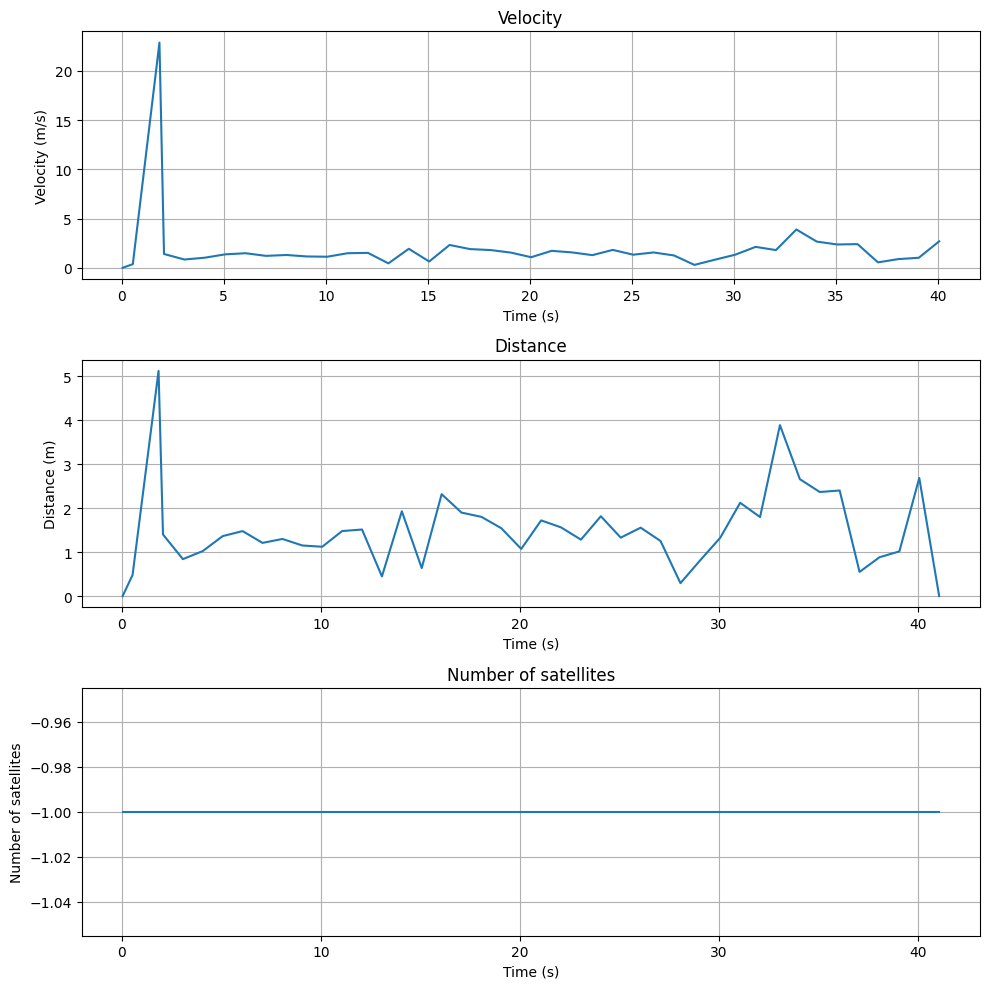

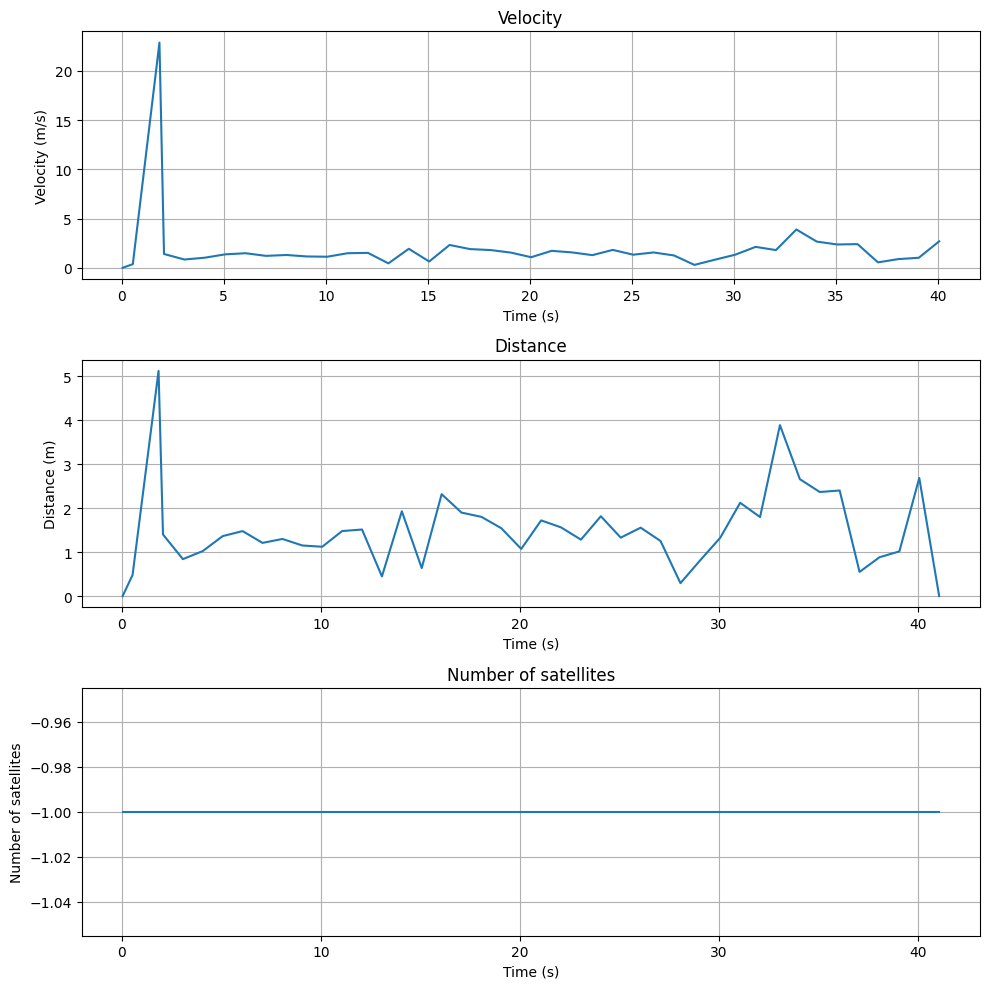

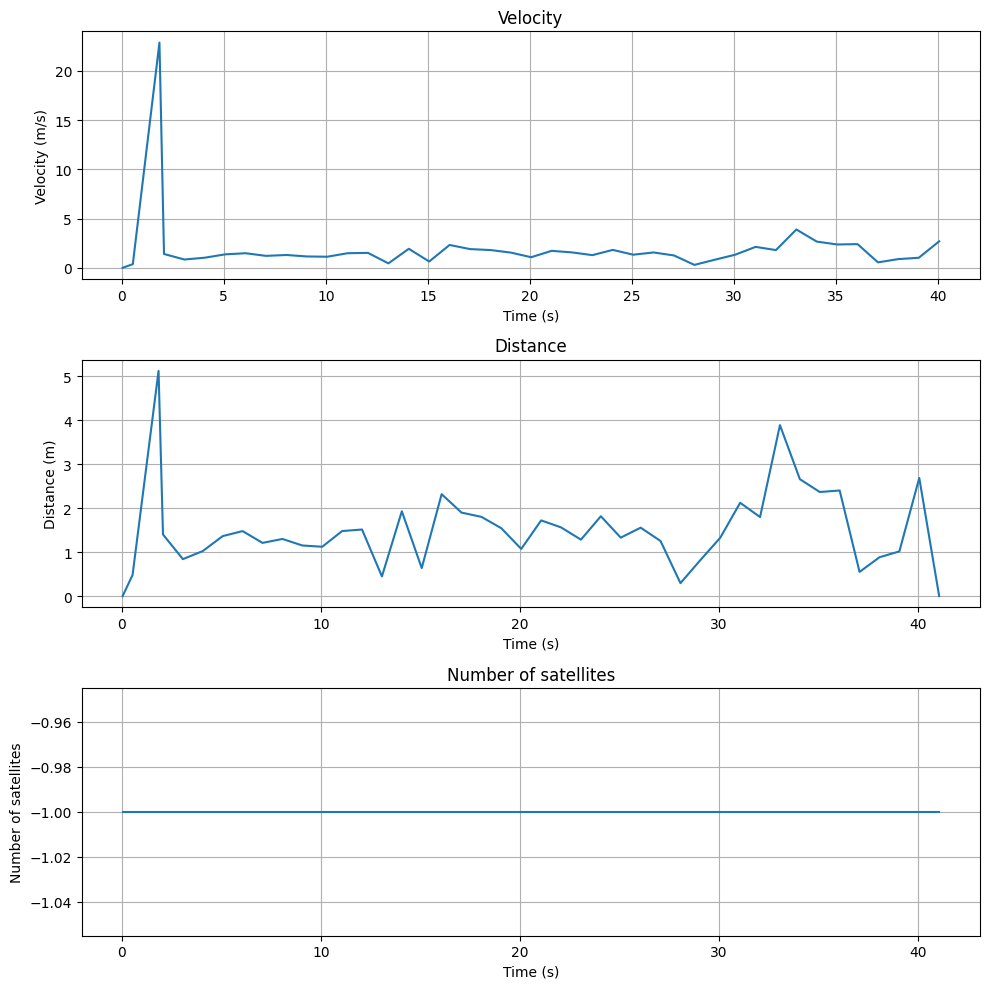

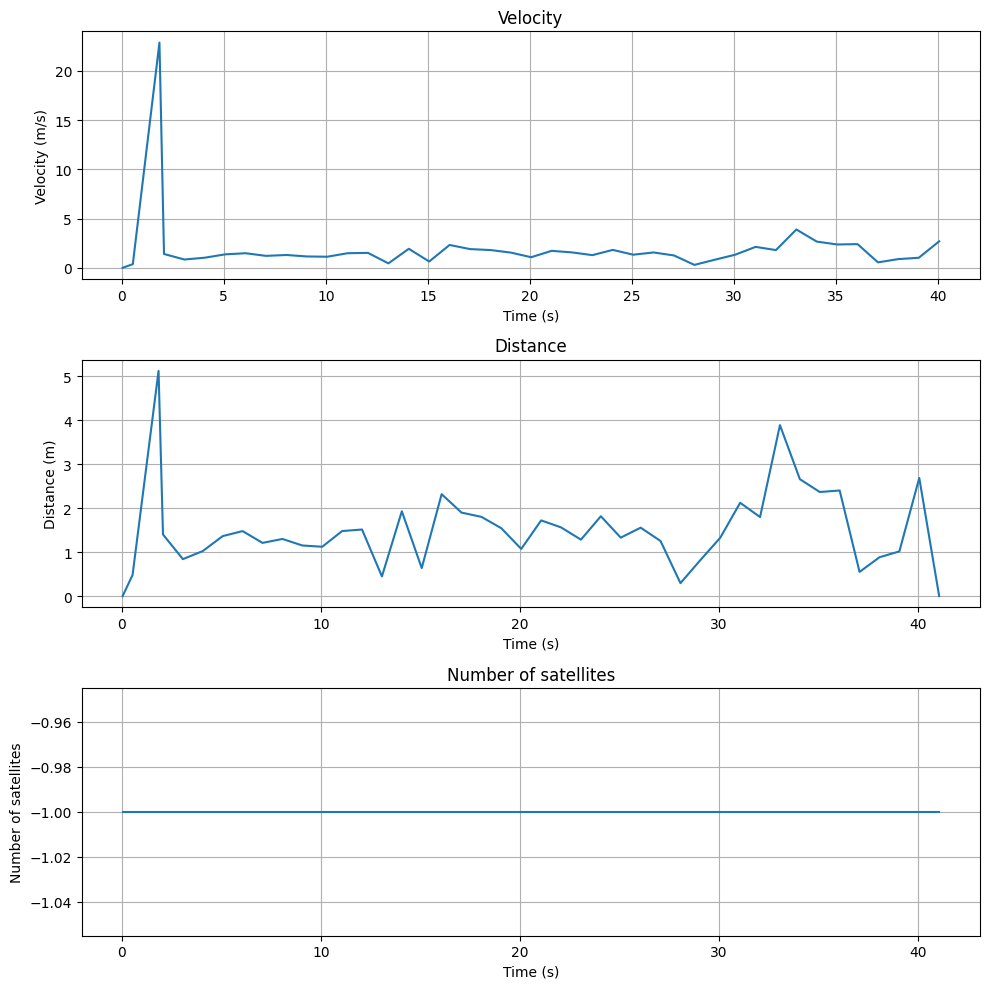

In [20]:
%pip install folium
import folium

location_frame = data[['Latitude (°)', 'Longitude (°)']] #Crate data frame with latitude and longitude
location_list = location_frame.values.tolist() #Create list from the frame

ave_lat = np.mean(location_list,axis = 0)[0] #Calculate the average latitude
ave_lon = np.mean(location_list,axis = 0)[1] #Calculate the average longitude

#load map centered on average location
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=19)

#add markers

for point in range(0, len(location_list)):
    folium.Marker(location_list[point], popup=data['Time (s)'][point]).add_to(my_map)


    #draw the walking path
    folium.PolyLine(location_list, color="blue", weight=2.5, opacity=1).add_to(my_map)

    #Draw a line plot of velocity (from data and using Haversine), distance and number of satellites.  (matplotlib.pyplot)

    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(3,1, figsize=(10,10))    
    ax[0].plot(data['Time (s)'], data['velocity'])
    ax[0].set_title('Velocity')
    ax[0].set_ylabel('Velocity (m/s)')
    ax[0].set_xlabel('Time (s)')
    ax[0].grid()    

    ax[1].plot(data['Time (s)'], data['dist'])
    ax[1].set_title('Distance')
    ax[1].set_ylabel('Distance (m)')
    ax[1].set_xlabel('Time (s)')
    ax[1].grid()
    
    ax[2].plot(data['Time (s)'], data['Satellites'])
    ax[2].set_title('Number of satellites')
    ax[2].set_ylabel('Number of satellites')
    ax[2].set_xlabel('Time (s)')
    ax[2].grid()

    plt.tight_layout()

    plt.show()


#save map
my_map.save("hakan_map.html")
my_map
